# 📘 Underfitting vs Overfitting in Machine Learning

---

## 🔹 Definitions & Core Insights

### **Underfitting**
- **Definition:** Model is too simple to capture patterns → performs poorly on both training & validation sets.  
- **Why/When it Happens:**
  - Model lacks capacity (too shallow or few parameters).
  - Too much regularization or simplified architecture.
  - Trained for too few epochs.
  - Poor feature representation or noisy data.
- **How it Looks:**
  - Training loss stays high and does not improve much.
  - Validation loss is also high (close to training).

---

### **Overfitting**
- **Definition:** Model learns patterns **and noise**, failing to generalize.  
- **Why/When it Happens:**
  - Too many parameters (complex model).
  - Too many epochs without regularization.
  - Small or unrepresentative training dataset.
- **How it Looks:**
  - Training loss → very low.
  - Validation loss → initially drops, then increases (divergence).

---

### **Good Fit (Generalization)**
- **Definition:** Model captures true patterns and generalizes well.  
- **Behavior:**
  - Training & validation losses both decrease and plateau close to each other.

---

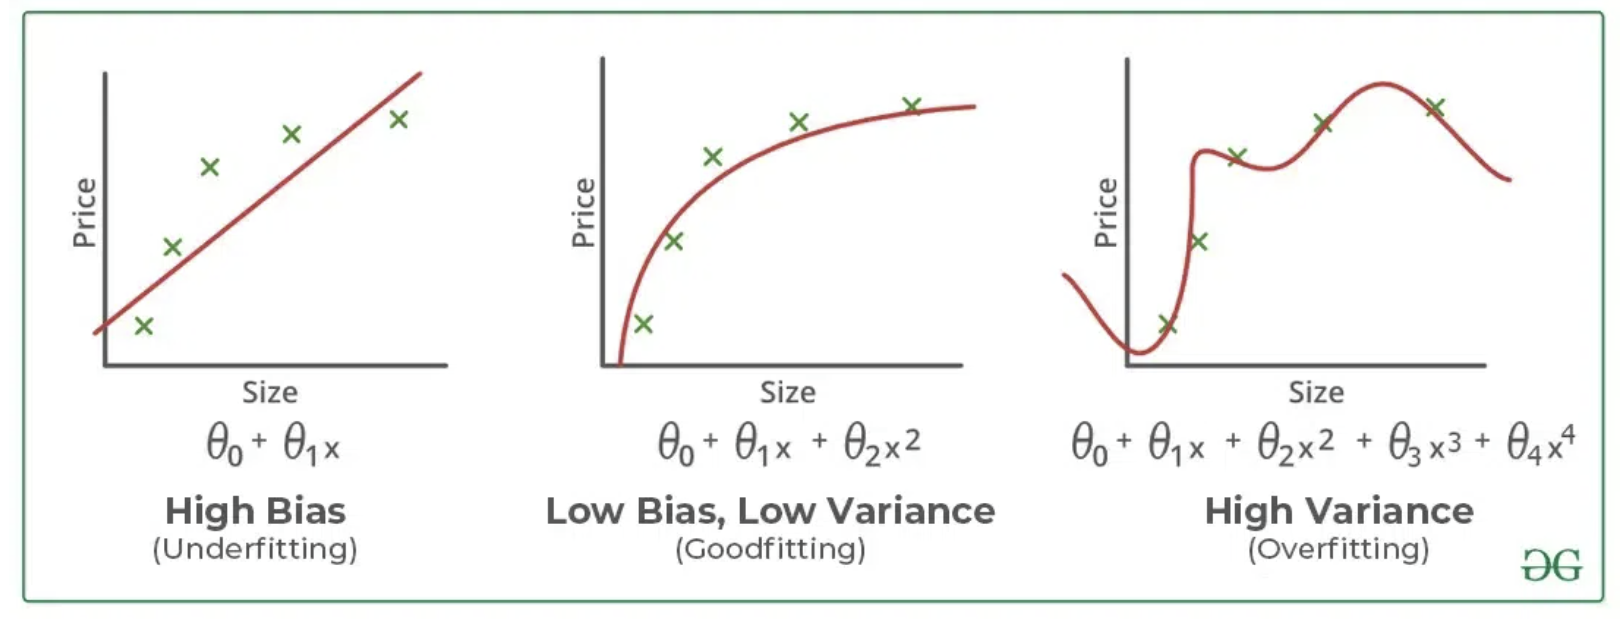

## Balance Between Bias and Variance

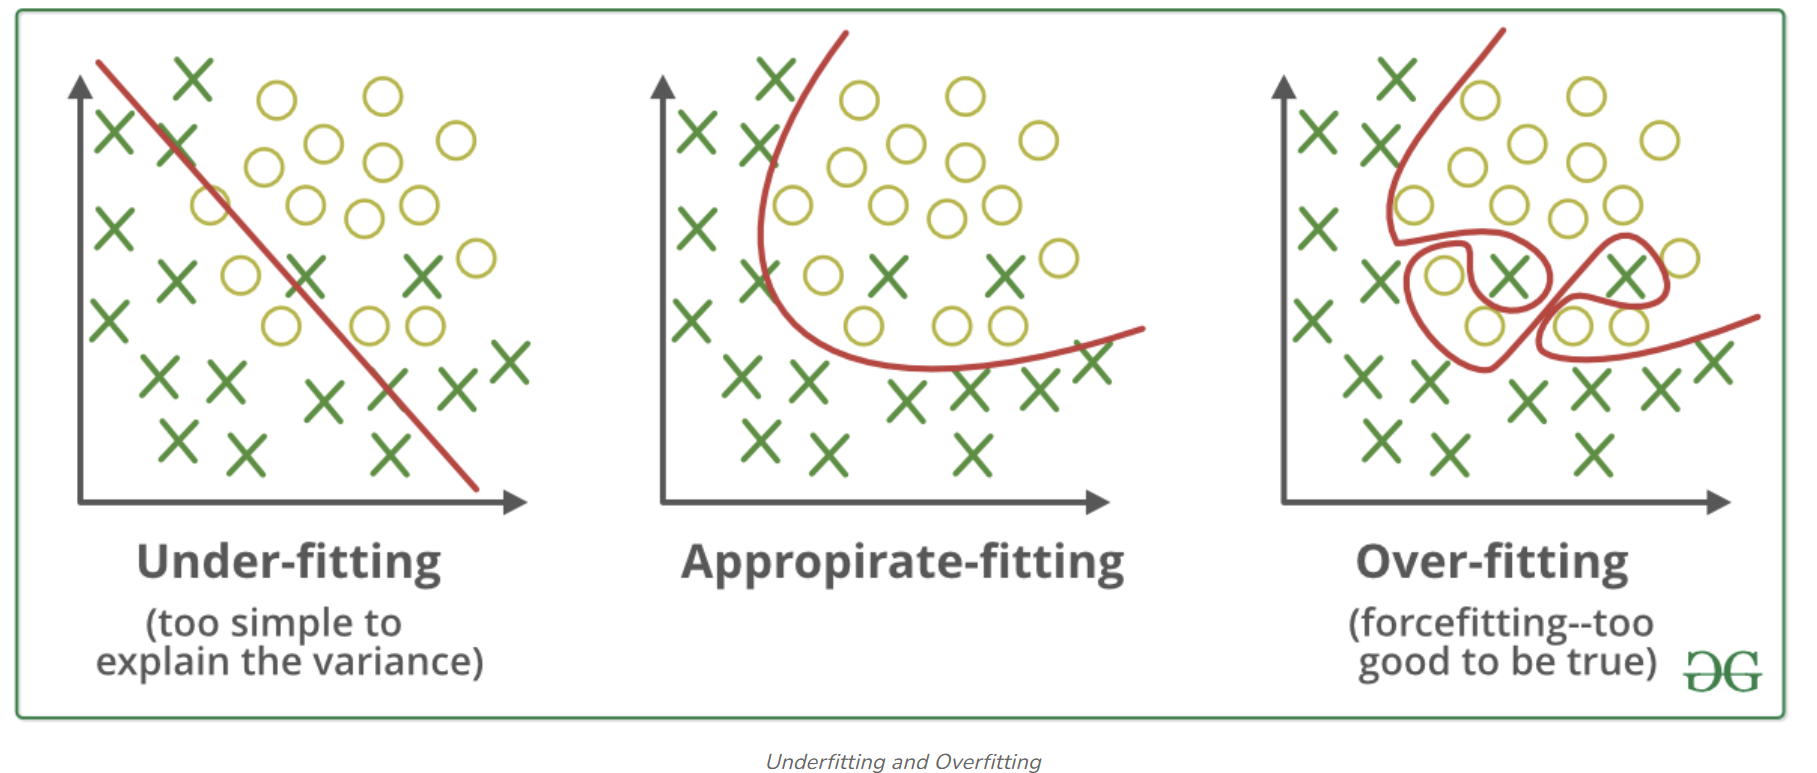

## 📊 Comparison Table: Underfitting vs Overfitting

| Aspect               | **Underfitting**                                   | **Overfitting**                                        |
|----------------------|----------------------------------------------------|--------------------------------------------------------|
| **Definition**       | Model too simple; fails to learn data patterns.    | Model too complex; memorizes training noise.           |
| **Training Loss**    | High; decreases slowly or stalls.                  | Very low; drops continuously.                          |
| **Validation Loss**  | High; close to training loss.                      | Initially decreases, then rises.                       |
| **Bias–Variance**    | High bias, low variance.                           | Low bias, high variance.                               |
| **Performance**      | Poor on both training and validation.              | Excellent on training, poor on validation.             |
| **Common Causes**    | Weak model, too much regularization, insufficient data. | Over-complex model, too many epochs, lack of regularization. |
| **Remedies**         | Increase complexity, train longer, reduce regularization. | Regularization, early stopping, simplify model, more data. |

---

## 📉 Training Loss vs Validation Loss Curves

Loss curves (loss vs epochs) help diagnose model fit:

### **A. Underfitting Curve**
- Training & validation loss → high and close.
- Model fails to learn patterns.

### **B. Good Fit Curve**
- Both losses decrease and plateau close to each other.
- Model generalizes well.

### **C. Overfitting Curve**
- Training loss decreases steadily.
- Validation loss decreases first → then rises (divergence).

## **Image for curves**

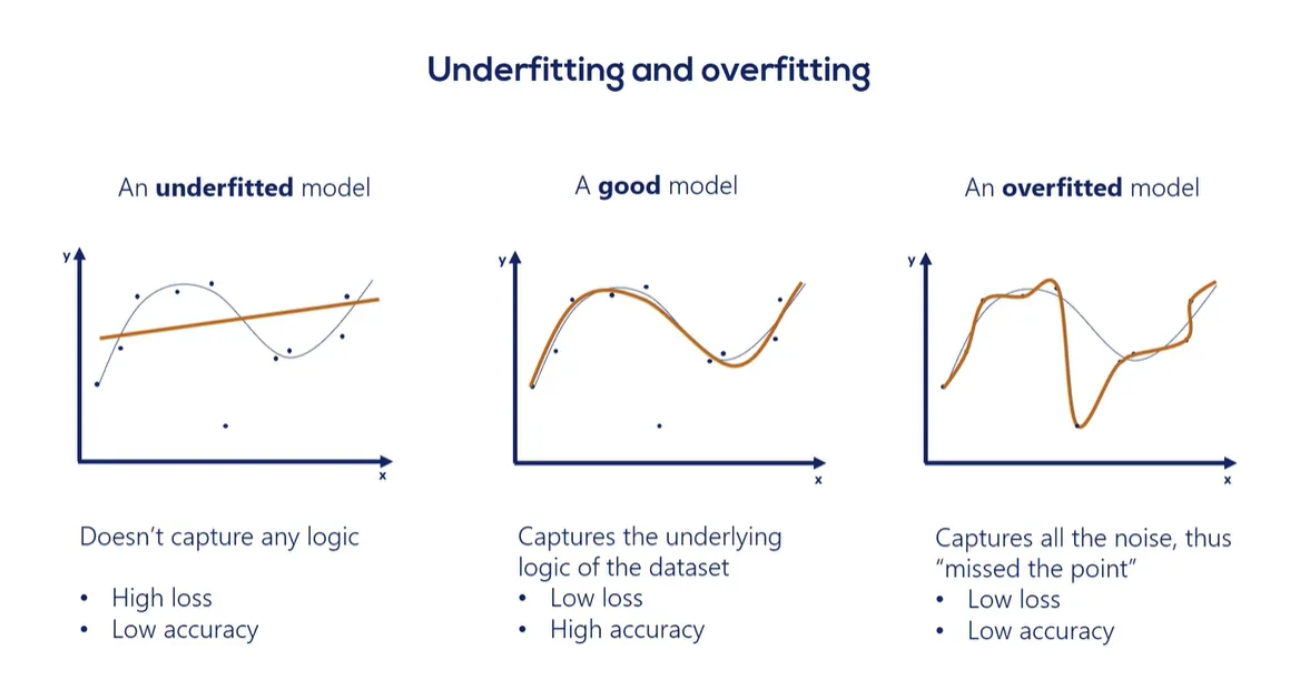


---

## ✅ Key Diagnostic Rules
- **Underfitting:** Both losses high → model too simple.  
- **Good Fit:** Losses low & close → proper generalization.  
- **Overfitting:** Training loss ↓ while validation loss ↑ → memorizing noise.  

---

## 📋 Summary Table: Curve Behavior by Model Fit

| Model Fit     | Training Loss Behavior             | Validation Loss Behavior               | Interpretation                  |
|---------------|------------------------------------|-----------------------------------------|---------------------------------|
| **Underfitting**  | High, flat, little improvement    | High, similar to training               | Too simple, poor learning       |
| **Good Fit**      | Decreases and plateaus            | Slightly higher, parallels training      | Balanced, generalizes well      |
| **Overfitting**   | Decreases steadily                | Drops then rises (diverges)             | Memorizes noise, poor generalization |

---


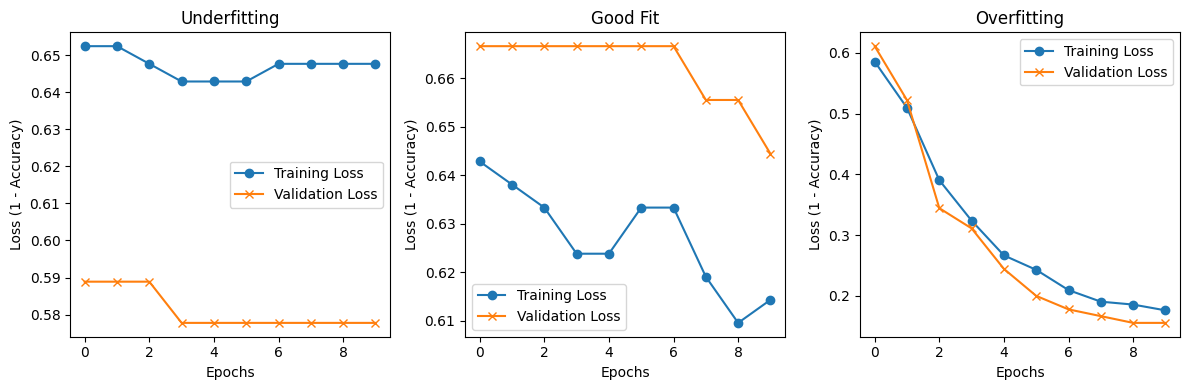

In [25]:
# Underfitting vs Good Fit vs Overfitting

# 1️⃣ Import Libraries
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

# 2️⃣ Create a simple dataset
# - 300 samples, 5 features → easier to visualize and faster to run
X, y = make_classification(n_samples=300, n_features=5, n_informative=3, n_redundant=0, random_state=42)

# Split into training (70%) and validation (30%) sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# 3️⃣ Define different models
# - Underfitting: too simple
# - Good Fit: balanced
# - Overfitting: too complex
configs = {
    "Underfitting": MLPClassifier(hidden_layer_sizes=(5,), max_iter=20, random_state=42),
    "Good Fit":     MLPClassifier(hidden_layer_sizes=(50,), max_iter=200, random_state=42),
    "Overfitting":  MLPClassifier(hidden_layer_sizes=(200,), max_iter=500, random_state=42)
}

# 4️⃣ Plotting setup
plt.figure(figsize=(12, 4))

# 5️⃣ Train each model and record training/validation loss
for i, (label, model) in enumerate(configs.items(), 1):
    history_train = []
    history_val = []

    # Train incrementally (simulate epochs)
    for epoch in range(10):
        # partial_fit allows incremental training (like 1 epoch at a time)
        model.partial_fit(X_train, y_train, classes=[0, 1])

        # Calculate "loss" as 1 - accuracy
        train_loss = 1 - model.score(X_train, y_train)
        val_loss = 1 - model.score(X_val, y_val)

        history_train.append(train_loss)
        history_val.append(val_loss)

    # Plot training and validation loss
    plt.subplot(1, 3, i)
    plt.plot(history_train, label="Training Loss", marker='o')
    plt.plot(history_val, label="Validation Loss", marker='x')
    plt.title(label)
    plt.xlabel("Epochs")
    plt.ylabel("Loss (1 - Accuracy)")
    plt.legend()

# 6️⃣ Show all plots neatly
plt.tight_layout()
plt.show()


**Code Explination**
- **Libraries Imported:** `matplotlib` for plotting, `make_classification` for dataset, `train_test_split` for splitting data, `MLPClassifier` for neural network models.
- **Dataset Creation:** 300 samples × 5 features, 3 informative features; split 70% training / 30% validation.
- **Model Configurations:**
    - Underfitting → small network `(5,)`, few iterations `20`
    - Good Fit → moderate network `(50,)`, moderate iterations `200`
    - Overfitting → large network `(200,)`, many iterations `500`
- **Training:** Uses `partial_fit` to train incrementally for 10 epochs; loss computed as `1 – accuracy`.
- **Recording Loss:** Tracks both training and validation loss per epoch for each model.
- **Plotting:** Plots training vs validation loss for each model in separate subplots to visualize underfitting, good fit, and overfitting.
- **Display:** Uses `plt.tight_layout()` for neat spacing and `plt.show()` to display plots.

**Output Explination**

**1️⃣ Underfitting (Left Plot)**

- **Observation:**
    - Both **training loss** and **validation loss** are high (~0.64–0.66).
    - Loss curves barely decrease over epochs.
- **Explanation:**
    - The model is **too simple** (only 5 neurons, few iterations).
    - It cannot capture patterns in the data.
    - Performance is poor on both training and validation sets.
- **Key takeaway:** Model capacity is insufficient → underfitting.

---

**2️⃣ Good Fit (Middle Plot)**

- **Observation:**
    - **Training loss** decreases gradually and stabilizes around ~0.61.
    - **Validation loss** is slightly higher but also decreasing, stays close to training loss.
- **Explanation:**
    - The model has **enough complexity** (50 neurons) to learn patterns.
    - Training and validation losses are close → no overfitting.
    - The model generalizes well to unseen data.
- **Key takeaway:** Balanced model → optimal fit.

---

**3️⃣ Overfitting (Right Plot)**

- **Observation:**
    - **Training loss** decreases rapidly to very low values (~0.18).
    - **Validation loss** stops improving after a few epochs (~0.15–0.25) and may even slightly increase.
- **Explanation:**
    - The model is **too complex** (200 neurons, high iterations).
    - Learns training data almost perfectly → very low training loss.
    - Fails to generalize → validation loss is higher and doesn’t improve much.
- **Key takeaway:** Model memorizes training data → overfitting occurs.

---

### **💡 Summary Table**

| Model | Training Loss | Validation Loss | Fit Type | Notes |
| --- | --- | --- | --- | --- |
| Underfitting | High (~0.65) | High (~0.58) | Poor Fit | Model too simple |
| Good Fit | Moderate (~0.61) | Moderate (~0.64) | Optimal Fit | Balanced learning |
| Overfitting | Very Low (~0.18) | Higher (~0.15–0.25) | Poor Generalization | Model too complex |

---

✅ **Main Insight from the Image:**

- **Underfitting:** model too simple → high error everywhere.
- **Good Fit:** model just right → low error, generalizes well.
- **Overfitting:** model too complex → very low training error but poor validation performance.

# 🎯 Bias-Variance Tradeoff in Machine Learning

---

## 🔹 1️⃣ What is Bias?

- **Definition:** Bias is the error introduced by approximating a complex real-world problem with a simplified model.  
- **High Bias:** Model makes strong assumptions → underfitting.  
- **Low Bias:** Model captures more complexity → fewer assumptions.  

**When it happens:**  
- Model too simple for the data patterns.  
- Strong regularization.  
- Too few features or shallow architecture.  

**Example:**  
- Using linear regression on a non-linear dataset → high bias.


---

## 🔹 2️⃣ What is Variance?

- **Definition:** Variance measures how much model predictions fluctuate for different training datasets.  
- **High Variance:** Model is too sensitive to training data → overfitting.  
- **Low Variance:** Predictions are stable across datasets.  

**When it happens:**  
- Model too complex.  
- Trained for too many epochs without regularization.  
- Small or unrepresentative training data.

**Example:**  
- Deep decision trees memorizing training data → high variance.


---

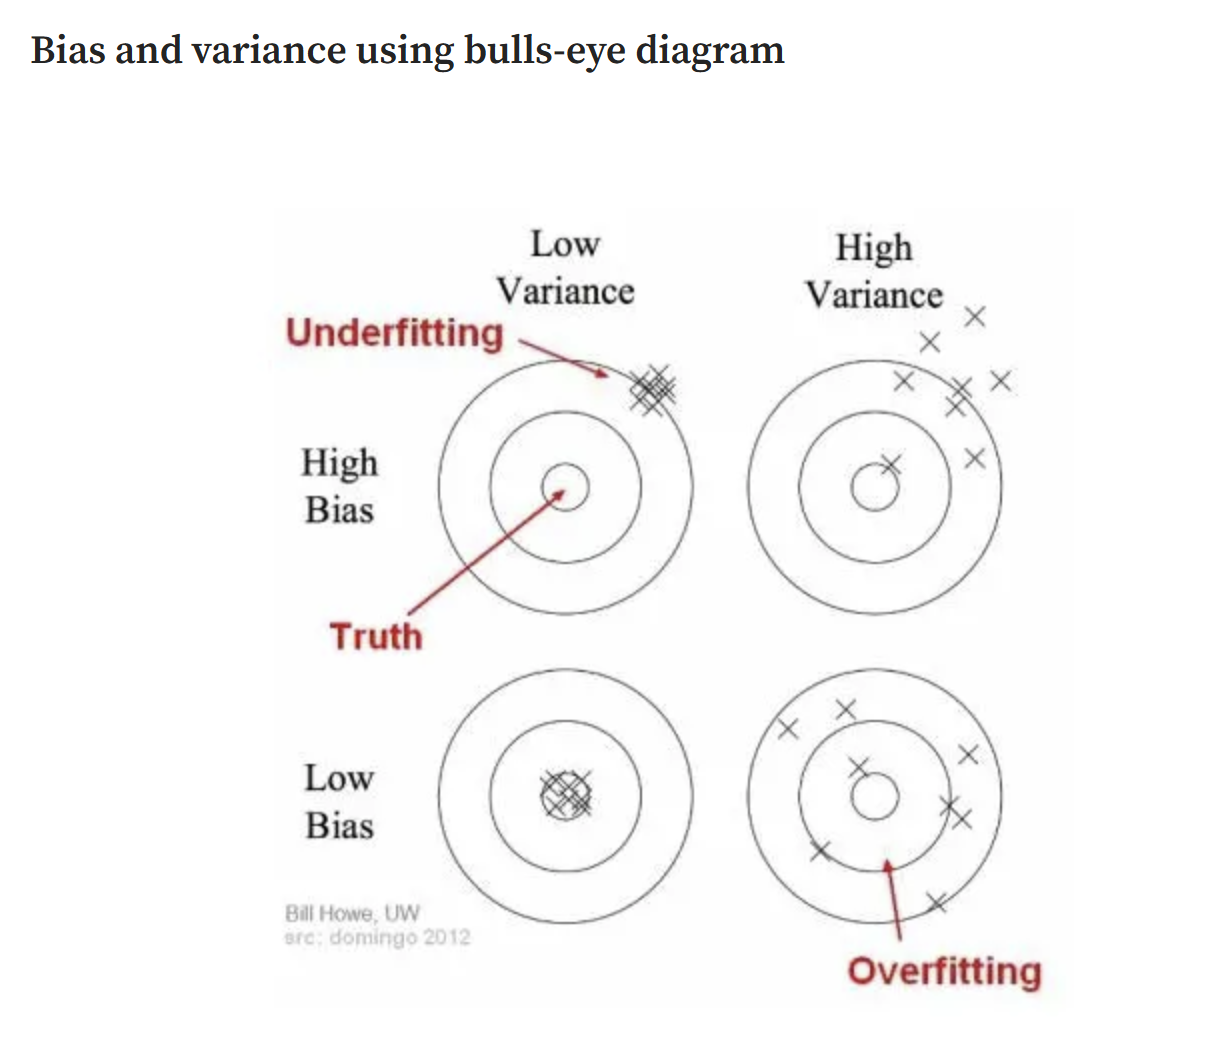


## 🔹 3️⃣ Bias-Variance Tradeoff

- **Definition:** Tradeoff between bias and variance; increasing model complexity reduces bias but increases variance, and vice versa.  
- **Goal:** Minimize total error to achieve good generalization on unseen data.

**Error Formula:**  

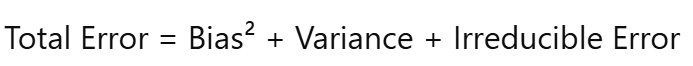


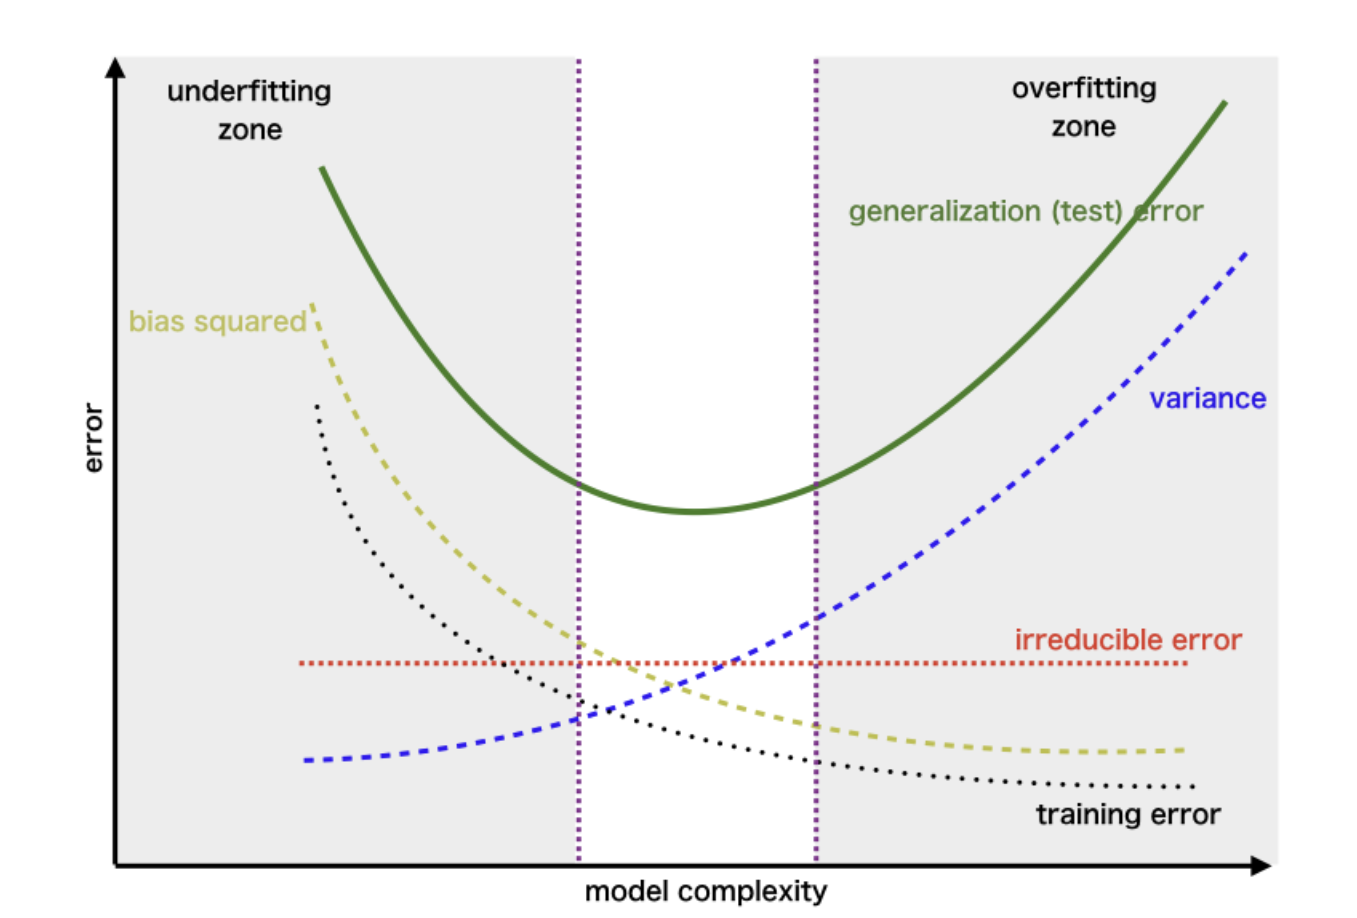

**Interpretation:**  

- High Bias → underfitting

  
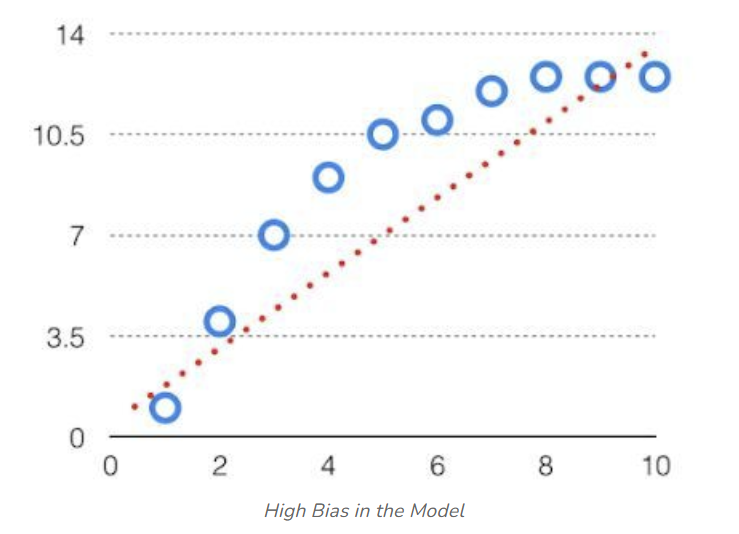

- High Variance → overfitting

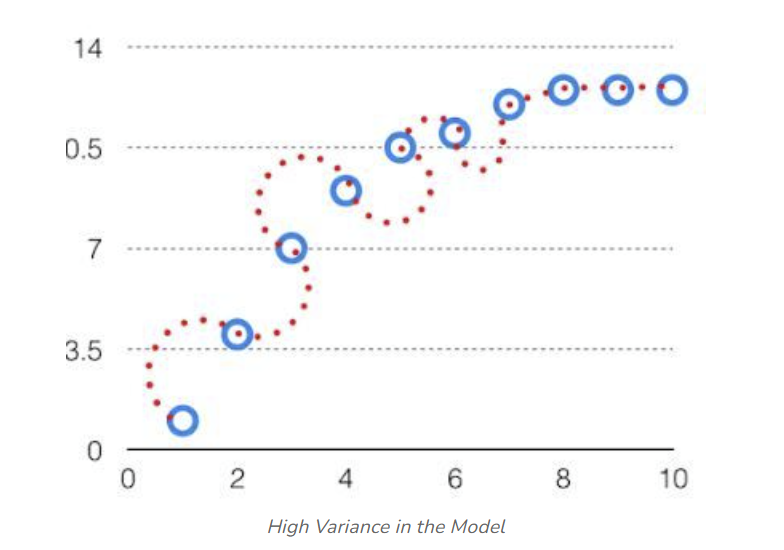

- Optimal → low total error (good generalization)

---



---

## 🔹 Practical Implications

### High Bias (Underfitting) 🟡
- Model too simple → poor training & test performance  
- Solutions:
  - Increase model complexity (more layers, neurons, or features)
  - Reduce regularization
  - Train longer / improve features

### High Variance (Overfitting) 🔴
- Model too complex → great training but poor test performance  
- Solutions:
  - Use regularization (L1/L2, dropout)
  - Simplify model (fewer parameters)
  - Add more data
  - Use ensemble methods (bagging, boosting)

### Balanced Model ✅
- Captures patterns without fitting noise → good generalization

---

## 🔹  Summary Table

| Model Behavior    | Bias      | Variance | Error Type             | Solution                                   |
|------------------|-----------|----------|------------------------|--------------------------------------------|
| Underfitting      | High      | Low      | High training & validation error | Increase model complexity, train more    |
| Good Fit          | Medium    | Medium   | Minimum total error    | Balanced approach                          |
| Overfitting       | Low       | High     | Low training error, high validation error | Regularization, more data, simplify model |

---

## 🔹  Key Takeaways

- Bias → systematic error (too simple)  
- Variance → sensitivity to training data (too complex)  
- Total error is minimized when **bias and variance are balanced**  
- Understanding this tradeoff is crucial for **diagnosing underfitting and overfitting**


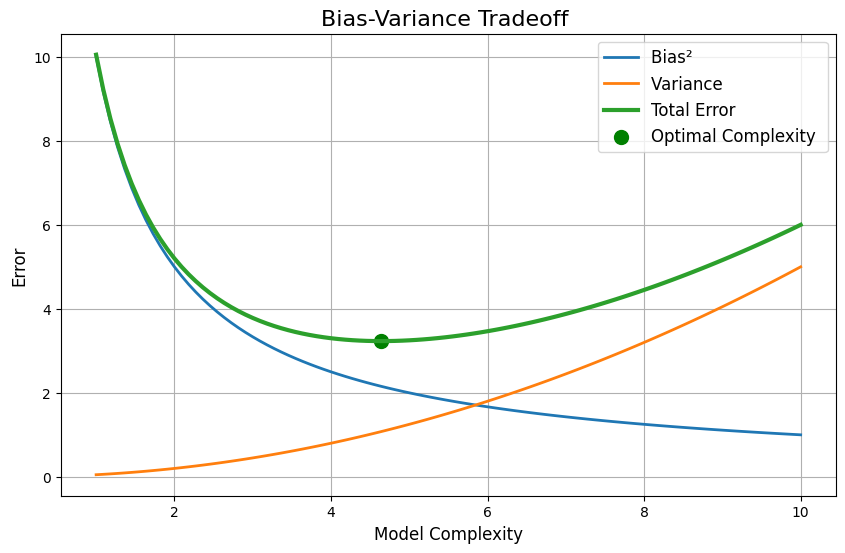

In [26]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

# --- Simulate Model Complexity ---
model_complexity = np.linspace(1, 10, 100)  # X-axis: Model complexity

# --- Simulated Bias², Variance, and Total Error ---
bias_squared = 10 / model_complexity               # Bias decreases with complexity
variance = (model_complexity**2) / 20             # Variance increases with complexity
total_error = bias_squared + variance             # Total error = Bias² + Variance

# --- Plot ---
plt.figure(figsize=(10,6))
plt.plot(model_complexity, bias_squared, label='Bias² ', linewidth=2)
plt.plot(model_complexity, variance, label='Variance ', linewidth=2)
plt.plot(model_complexity, total_error, label='Total Error ', linewidth=3)

# Highlight minimum total error (optimal complexity)
min_idx = np.argmin(total_error)
plt.scatter(model_complexity[min_idx], total_error[min_idx], color='green', s=100, label='Optimal Complexity ')

# Labels and title
plt.title('Bias-Variance Tradeoff ', fontsize=16)
plt.xlabel('Model Complexity', fontsize=12)
plt.ylabel('Error', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


**Output interpretation**
- **Bias² (blue)**: Downward-sloping → high at low complexity (underfitting), decreases as model becomes more flexible.
- **Variance (orange)**: Upward-sloping → low at low complexity, increases as model memorizes training data (overfitting).
- **Total Error (green, U-shaped)**: Sum of bias² and variance → high at very low or very high complexity.
- **Optimal Complexity** : Lowest point of total error → best balance between bias and variance → minimum error on unseen data.

# 🛠️ Regularization Techniques in Machine Learning

Regularization helps prevent **overfitting**, ensuring that models generalize well to unseen data. Here are the most widely-used methods:

---

## 1️⃣ L1 vs L2 Regularization (Weight Decay)

### **L1 Regularization (Lasso) 🟦**
- **Mechanism:** Adds a penalty proportional to the **absolute value** of the weights:

  
  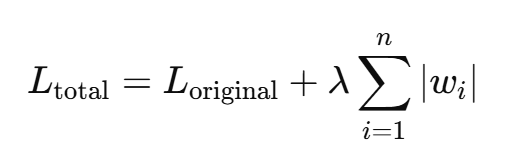
  
- **Effect:** Encourages **sparsity**, driving some weights to zero → performs **feature selection**.  
- **Use Cases:** High-dimensional datasets where feature selection is important.  
- **Implementation (PyTorch):** Add sum of absolute values of weights to loss.

---

### **L2 Regularization (Ridge) 🟩**
- **Mechanism:** Adds a penalty proportional to the **squared value** of the weights:

  
  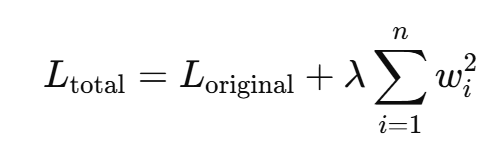
  
- **Effect:** Encourages **smaller weights**, resulting in smoother models and reduced overfitting.  
- **Use Cases:** When all features are expected to contribute.  
- **Implementation (PyTorch):** Add sum of squared weights to loss.

---

### **Elastic Net 🔷**
- **Mechanism:** Combines **L1 + L2 penalties**:
  
  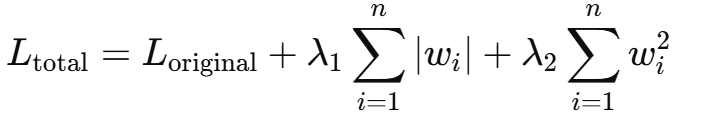

- **Effect:** Balances sparsity and smoothness; handles correlated features.  
- **Use Cases:** Datasets with multiple correlated features.

---

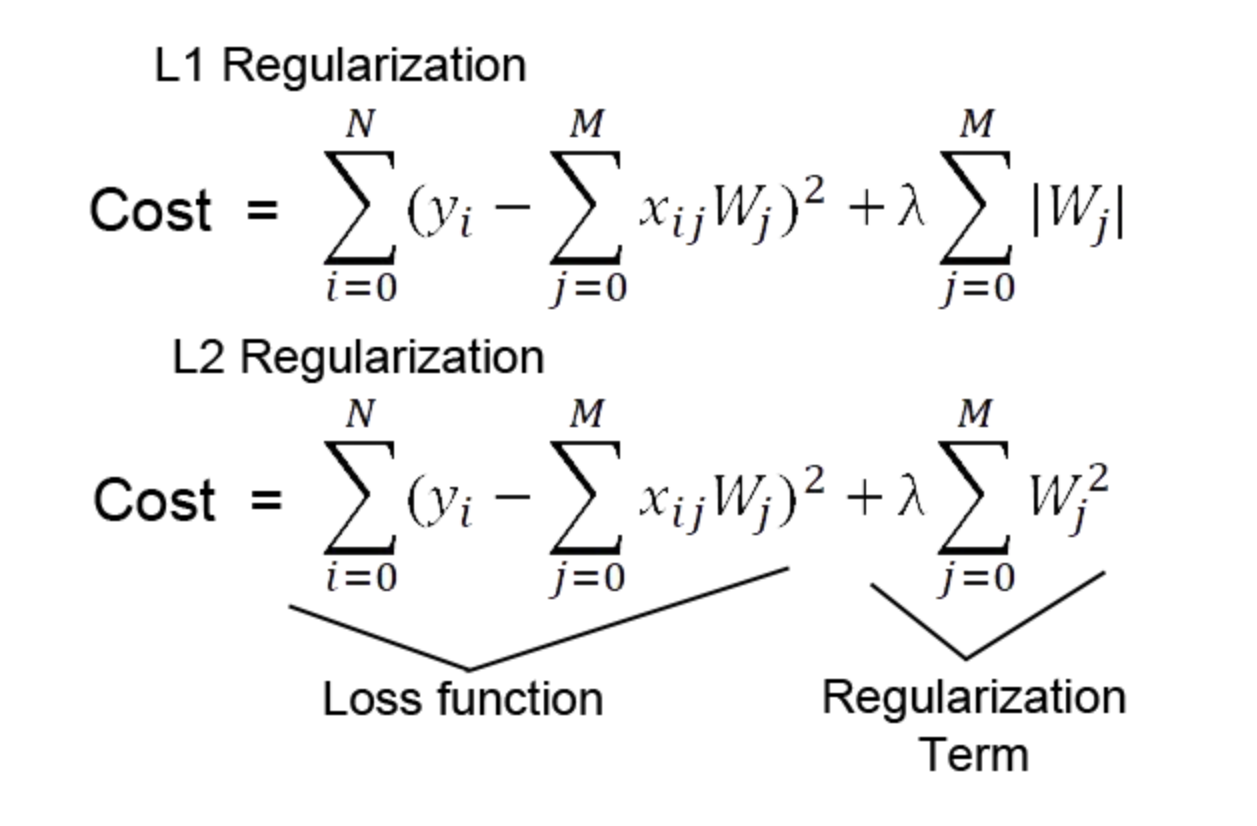

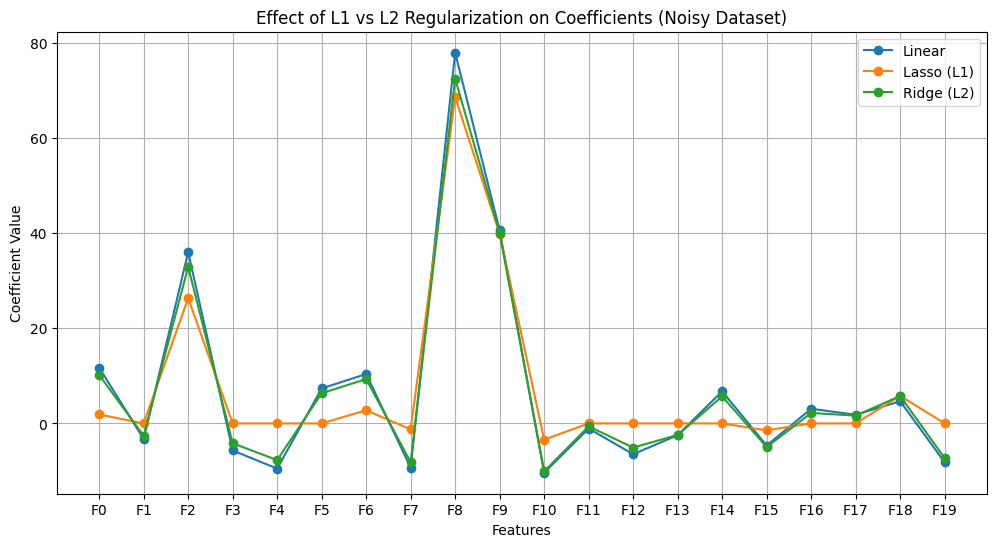

R^2 Scores:
Linear Regression: 0.849
Lasso (L1): 0.810
Ridge (L2): 0.846


In [27]:
# 🔹 L1 vs L2 Regularization Demonstration (Noisy, High-Dimensional Dataset)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.datasets import make_regression

# --- Create a high-dimensional, noisy dataset ---
X, y = make_regression(n_samples=100, n_features=20, n_informative=5,
                       noise=50, random_state=42)

# --- Fit models ---
# 1️⃣ Ordinary Linear Regression (no regularization)
lr = LinearRegression()
lr.fit(X, y)

# 2️⃣ L1 Regularization (Lasso)
lasso = Lasso(alpha=5.0)  # larger alpha to see strong L1 effect
lasso.fit(X, y)

# 3️⃣ L2 Regularization (Ridge)
ridge = Ridge(alpha=5.0)  # larger alpha to see L2 shrinkage
ridge.fit(X, y)

# --- Compare coefficients ---
coef_matrix = np.vstack([lr.coef_, lasso.coef_, ridge.coef_])
labels = ['Linear', 'Lasso (L1)', 'Ridge (L2)']

plt.figure(figsize=(12,6))
for i, coef in enumerate(coef_matrix):
    plt.plot(range(len(coef)), coef, marker='o', label=labels[i])

plt.xticks(range(X.shape[1]), [f'F{i}' for i in range(X.shape[1])])
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Effect of L1 vs L2 Regularization on Coefficients (Noisy Dataset)')
plt.legend()
plt.grid(True)
plt.show()

# --- Compare model performance ---
print("R^2 Scores:")
print(f"Linear Regression: {lr.score(X, y):.3f}")
print(f"Lasso (L1): {lasso.score(X, y):.3f}")
print(f"Ridge (L2): {ridge.score(X, y):.3f}")


**Code Explination**
- **Dataset Creation:**
    - `make_regression(n_samples=100, n_features=20, n_informative=5, noise=50)` → 100 samples, 20 features, 5 informative, added noise to simulate real-world data.
- **Model Setup:**
    - **LinearRegression:** no regularization → may overfit noisy data.
    - **Lasso (L1, alpha=5.0):** forces some coefficients to zero → feature selection, reduces overfitting.
    - **Ridge (L2, alpha=5.0):** shrinks all coefficients → smoother model, reduces overfitting without zeroing features.
- **Model Training:**
    - Fit each model on the same dataset using `.fit(X, y)`.
- **Coefficient Comparison:**
    - `coef_matrix = np.vstack([...])` → combines coefficients for plotting.
    - Plot shows:
        - Linear → large variation, noisy features have large weights.
        - Lasso → some coefficients exactly 0 → sparsity.
        - Ridge → all coefficients shrunk → smoother.
- **Performance Evaluation:**
    - `R² score` for each model → proportion of variance explained.
    - Linear highest (may overfit), Lasso lower (ignores noisy features), Ridge slightly lower (smoothed coefficients).

---

**Output Explination**

**R² Scores**

- **Linear Regression (0.849):** highest R² on training data → may overfit due to noise.
- **Lasso (0.810):** slightly lower R² → some features set to 0 → ignores noisy features → better generalization.
- **Ridge (0.846):** close to linear regression → coefficients shrunk → reduces overfitting without zeroing features.

---

**Coefficient Plot**

- **Linear:** Large variation, noisy features get large coefficients.
- **Lasso(L1):** Many coefficients **exactly zero**, selects only informative features.
- **Ridge(L2):** All coefficients smaller, smoother, no zeros → reduces overfitting but keeps all features.

---

### **Key Takeaways**

- **L1 Regularization (Lasso):** Feature selection → sparsity, ignores irrelevant/noisy features.
- **L2 Regularization (Ridge):** Shrinks weights → smoother model → reduces impact of noise.
- **Linear Regression:** Can overfit noisy or high-dimensional data.
---

## 2️⃣ Dropout Regularization 🔹
- **Definition:** Randomly deactivates a fraction of neurons during training.  
- **Purpose:** Reduces **co-adaptation** of neurons → prevents overfitting.  
- **How it Works:**  
  - **Training:** Randomly disables neurons → network learns redundant representations.  
  - **Inference:** No neurons dropped; weights scaled appropriately.

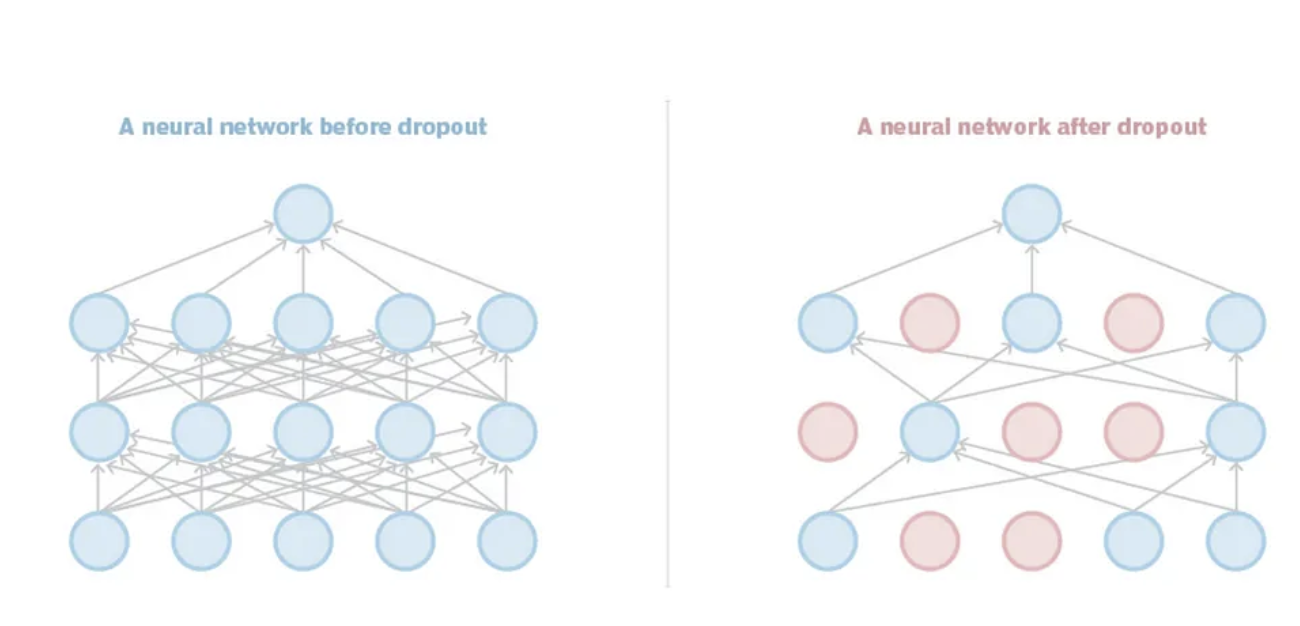

- **Advantages:**  
  - Prevents overfitting 🛡️  
  - Improves generalization 🌱  
  - Acts as an ensemble of smaller networks 💡  
- **Use Cases:**  
  - Deep neural networks with many parameters  
  - Models prone to overfitting small datasets

---

#### ⚠️ Drawbacks & Mitigation

- **Longer Training Times**: Dropout increases training time as the network learns with different subsets of neurons in each iteration.
- **Mitigation**: Use powerful computing resources or parallelized training.
- **Optimization Complexity**: The randomness introduced by dropout can make optimization more challenging.
- **Mitigation**: Experiment with different dropout rates on a smaller scale before full implementation.

---
## 3️⃣ Comparison: Dropout vs Weight Decay 📝

| Aspect          | Dropout 🔹                     | Weight Decay (L2) 🟩                   |
|-----------------|--------------------------------|---------------------------------------|
| **Mechanism**   | Randomly deactivates neurons   | Adds penalty proportional to squared weights |
| **Effect**      | Learns redundant representations | Prevents reliance on any single feature |
| **Implementation** | Applied as a layer in the network | Added to loss function                 |
| **Use Case**    | Deep networks with many parameters | Models where all features matter     |

---


In [28]:
# Dropout

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# 1️⃣ Create a simple dataset
X, y = make_classification(n_samples=500, n_features=10, n_informative=8,
                           n_redundant=2, random_state=42)

# 2️⃣ Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


- Creates a synthetic dataset with:
    - **500 samples**
    - **10 features**, where **8 are informative** (useful for prediction) and **2 redundant** (linear combinations of others).
- `random_state=42` ensures reproducibility.Creates a synthetic dataset with:
    - **500 samples**
    - **10 features**, where **8 are informative** (useful for prediction) and **2 redundant** (linear combinations of others).
- `random_state=42` ensures reproducibility.

Splits data into:

- **70% training set** → model learns patterns.
- **30% test set** → evaluate model on unseen data.

In [29]:
# 3️⃣ Build a small neural network with Dropout
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),  # 50% neurons randomly dropped during training
    Dense(16, activation='relu'),
    Dropout(0.3),  # 30% neurons randomly dropped
    Dense(1, activation='sigmoid')  # Binary classification output
])

C:\Users\ASUS1\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


- **Dense(32)** → first hidden layer with 32 neurons, ReLU activation.
- **Dropout(0.5)** → randomly disables 50% of neurons during training → prevents co-adaptation and overfitting.
- **Dense(16)** → second hidden layer with 16 neurons, ReLU activation.
- **Dropout(0.3)** → randomly disables 30% of neurons during training.
- **Dense(1, activation='sigmoid')** → output layer for **binary classification**.

**Key Dropout Behavior:**
-  During training → randomly zeroes out neurons.
-   During inference → all neurons active, scaled automatically by Keras.

In [30]:
# 4️⃣ Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 5️⃣ Train the model
# epochs=50 is used so the model has enough chances to learn patterns
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2)

# 6️⃣ Evaluate on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.3f}")


Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.5000 - loss: 1.0660 - val_accuracy: 0.5143 - val_loss: 0.8805
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5679 - loss: 0.8936 - val_accuracy: 0.5000 - val_loss: 0.7831
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5393 - loss: 0.8597 - val_accuracy: 0.5714 - val_loss: 0.7436
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5500 - loss: 0.7661 - val_accuracy: 0.5571 - val_loss: 0.7248
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.5607 - loss: 0.7251 - val_accuracy: 0.6000 - val_loss: 0.7114
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.5857 - loss: 0.7110 - val_accuracy: 0.6000 - val_loss: 0.7011
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.6143 - loss: 0.7058 - val_accuracy: 0.6000 - val_loss: 0.6940
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.6143 - loss: 0.6900 - val_accuracy: 0.6000 - v

- **Optimizer:** Adam → adaptive learning rate, handles gradient updates efficiently.
- **Loss:** Binary cross-entropy → suitable for 0/1 classification.
- **Metrics:** Accuracy → tracks how well the model predicts correctly.
- **epochs=50:** model sees the whole training dataset 50 times → enough for learning patterns.
- **batch_size=16:** updates weights after every 16 samples → balances speed and stability.
- **validation_split=0.2:** 20% of training data is used for validation → monitor generalization.
- **Dropout effect:** introduces randomness, which helps prevent overfitting.
- Evaluates **performance on unseen data**.
- `test_acc` → gives **generalization accuracy** (how well model performs beyond training data).

**Output explination**
- The model starts with **low accuracy (~53%)** and high loss in early epochs because it’s just beginning to learn.
- As training progresses, **training accuracy rises (~83–85%)** and loss decreases, showing the model is learning patterns.
- **Validation accuracy (~71–73%)** stays slightly lower, which is normal due to **Dropout randomly deactivating neurons**—this prevents overfitting.
- On the **test set**, the model achieves **87.3% accuracy**, showing it **generalizes well** to unseen data.
- Overall, Dropout helps the model **learn robust features** while reducing overfitting, even though training fluctuates slightly

# 🛑 Early Stopping in Deep Learning

Regularization is crucial in deep learning to prevent overfitting. **Early stopping** is a widely-used technique that halts training **before the model starts to memorize the training data**, ensuring better generalization.

---

## 🔹 What Is Early Stopping?

- **Definition:** Early stopping monitors the model’s performance on a **validation set** during training and stops training when performance stops improving.  
- **Goal:** Prevent the model from learning noise or random fluctuations in the training data.  

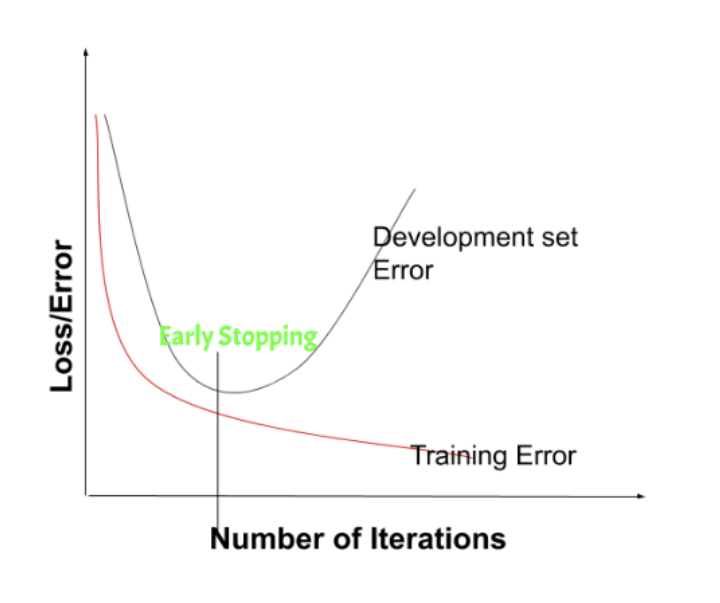

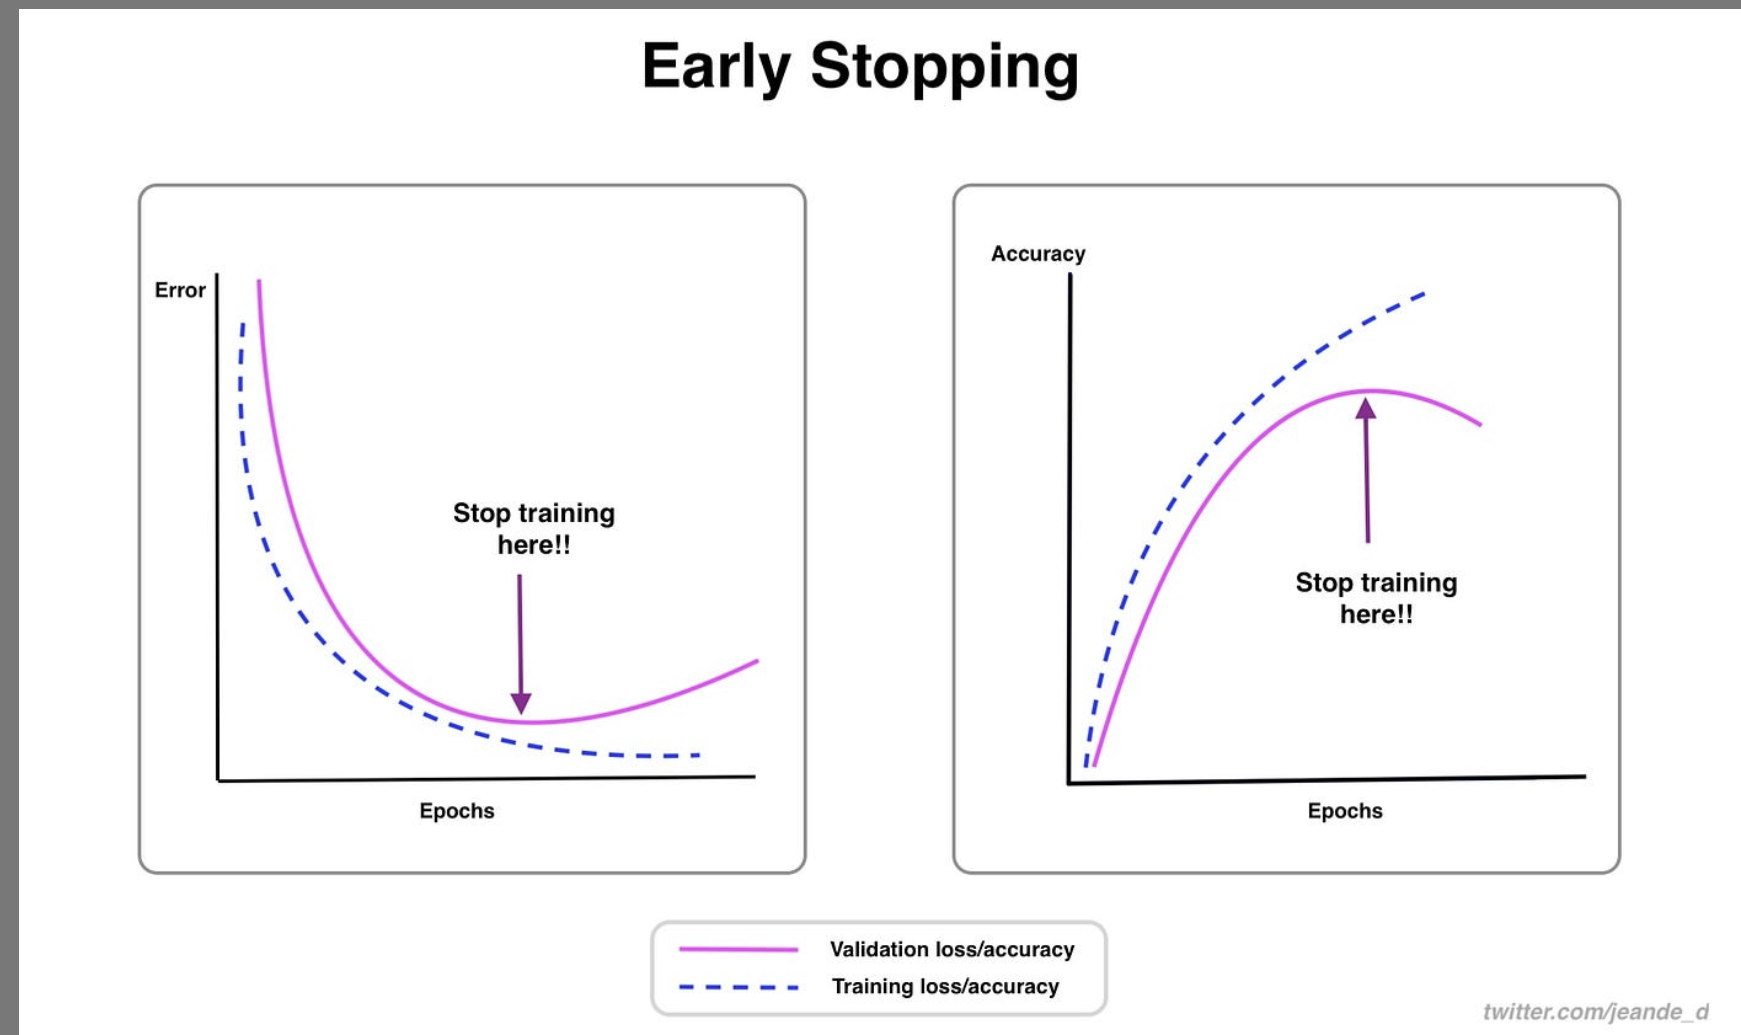

---

## 🔹 Why Use Early Stopping?

- **Prevents Overfitting:** Stops training when validation performance stops improving, improving generalization.  
- **Saves Resources:** Reduces computational costs by halting training early.  
- **Improves Efficiency:** Models often reach better performance **faster** without unnecessary epochs.  

---

## 🔹 How It Works

1. **Monitor Validation Performance:** Track metrics like **validation loss** or **accuracy**.  
2. **Set Patience:** Define how many epochs to wait for improvement before stopping.  
3. **Stop Training:** If no improvement after the set patience, halt training.  
4. **Restore Best Weights:** Optionally revert the model to the weights from the epoch with the best validation performance.  

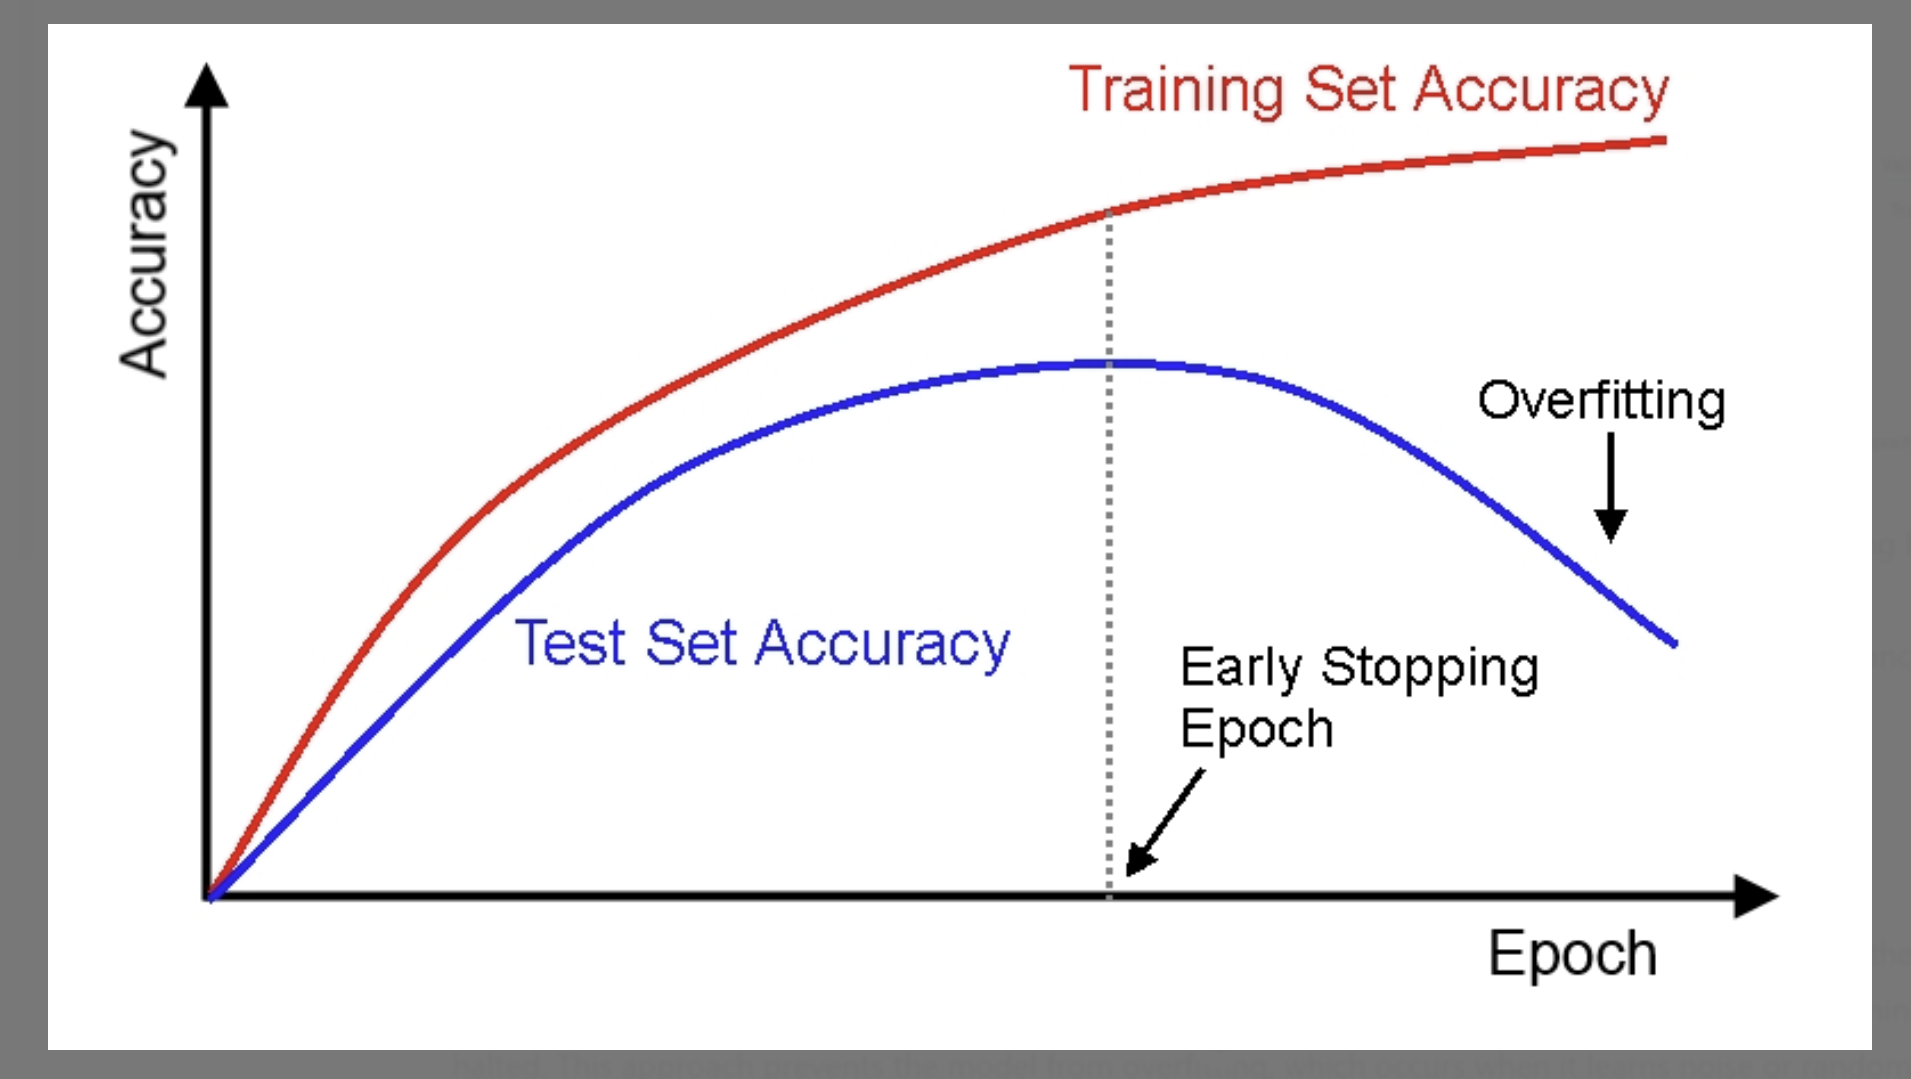

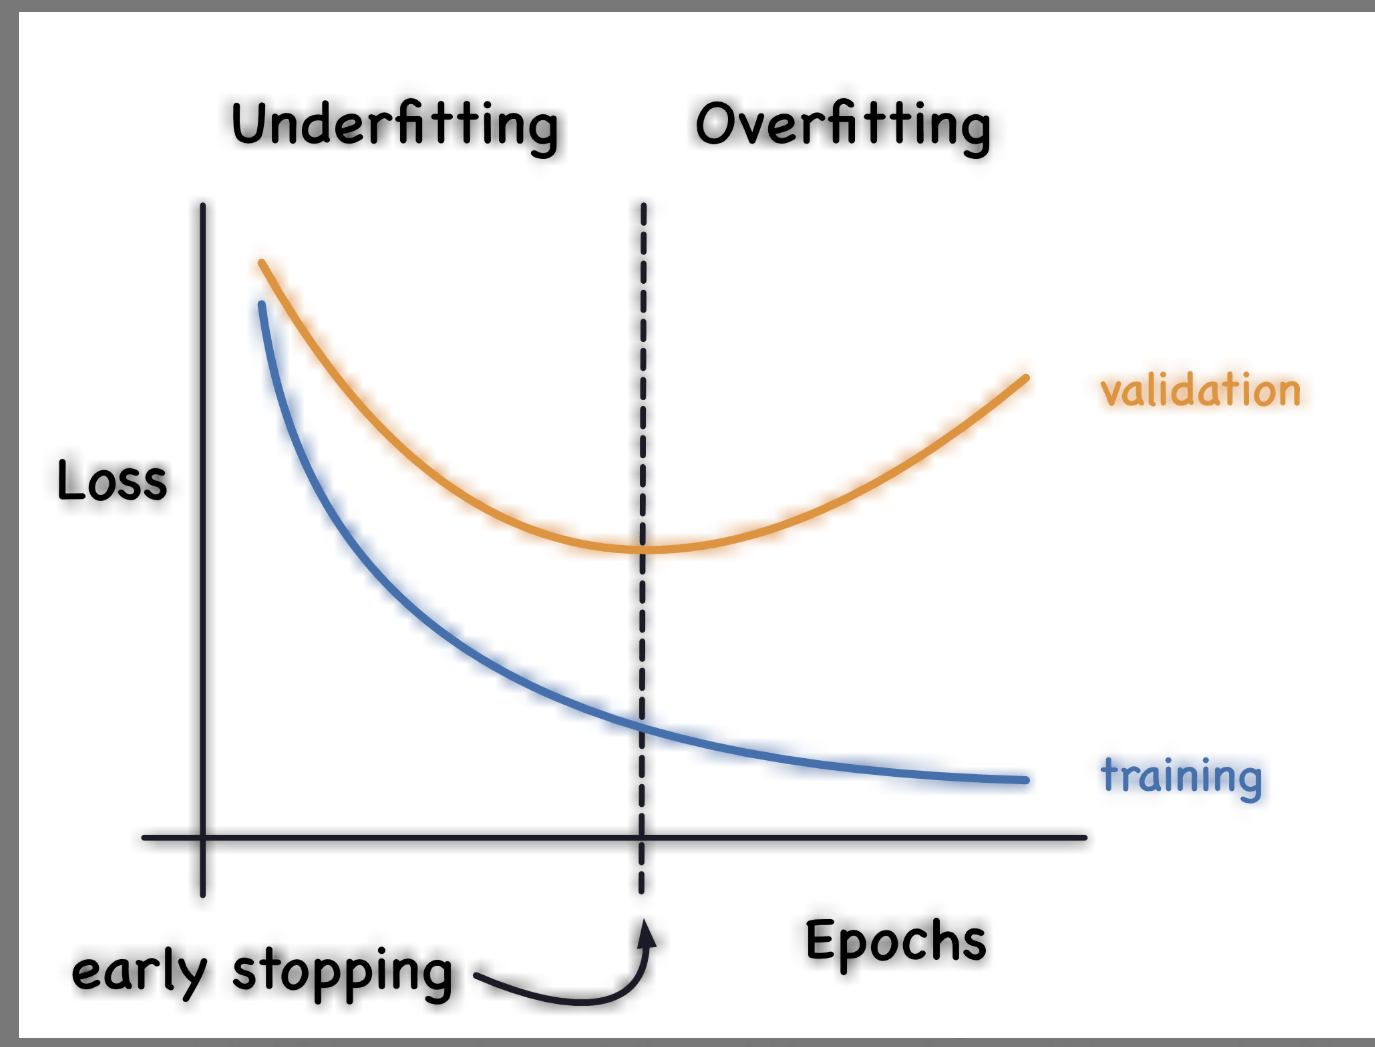

---

## 🔹 Considerations & Limitations

- **Risk of Underfitting:** Stopping too early may prevent the model from fully learning patterns.  
- **Validation Set Quality:** Effectiveness depends on a **representative validation set**.  
- **Computational Overhead:** Checking validation performance each epoch adds some cost.  

---

## 🔹 Comparison with Other Regularization Techniques

| Technique       | Description                                                       | Pros                               | Cons                                         |
|-----------------|-------------------------------------------------------------------|-----------------------------------|---------------------------------------------|
| Early Stopping  | Stops training when validation performance stops improving        | Prevents overfitting, saves resources | Risk of underfitting, depends on validation set |
| Dropout         | Randomly disables neurons during training                         | Improves generalization           | Increases training time                      |
| L2 Regularization | Adds penalty to loss function based on magnitude of weights     | Reduces overfitting               | Requires tuning of regularization strength  |

---

## 🔹 In Short

- **Early stopping** is a **simple and effective regularization technique**.  
- Ensures **better generalization** by monitoring validation performance.  
- Helps **reduce training time** and computational resources.  
- Requires careful **patience tuning** to balance underfitting vs overfitting.
---

In [31]:
# 1️⃣ Create a simple dataset
X, y = make_classification(n_samples=500, n_features=10, n_informative=8,
                           n_redundant=2, random_state=42)

# 2️⃣ Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

- Creates a synthetic **binary classification dataset** with:
    - 500 samples
    - 10 features (8 informative + 2 redundant)
- `random_state=42` ensures reproducibility.
- Splits data into:
    - **70% training**
    - **30% testing**
- Ensures the model is evaluated on unseen data.

In [32]:
# 3️⃣ Build a small neural network
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# 4️⃣ Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

- **Layer 1:** Dense layer with 32 neurons + ReLU activation.
- **Dropout 0.5:** Randomly drops 50% of neurons **during training** → reduces overfitting.
- **Layer 2:** Dense layer with 16 neurons + ReLU.
- **Output Layer:** 1 neuron + Sigmoid → binary classification output.
- **Optimizer:** Adam (adaptive learning rate).
- **Loss Function:** Binary Crossentropy → suitable for binary classification.
- **Metric:** Accuracy → to monitor performance.

In [33]:
from tensorflow.keras.callbacks import EarlyStopping
# 5️⃣ Define Early Stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# 6️⃣ Train the model with Early Stopping
history = model.fit(X_train, y_train, 
                    epochs=100,               # Large number of epochs
                    batch_size=16, 
                    validation_split=0.2,
                    callbacks=[early_stop])

# 7️⃣ Evaluate on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.3f}")

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.4643 - loss: 1.1114 - val_accuracy: 0.4714 - val_loss: 0.8843
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5286 - loss: 0.8327 - val_accuracy: 0.5286 - val_loss: 0.7941
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5536 - loss: 0.7560 - val_accuracy: 0.5429 - val_loss: 0.7493
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5393 - loss: 0.8294 - val_accuracy: 0.5429 - val_loss: 0.7201
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6071 - loss: 0.6922 - val_accuracy: 0.5143 - val_loss: 0.7031
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6000 - loss: 0.6828 - val_accuracy: 0.5857 - val_loss: 0.6838
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6643 - loss: 0.6447 - val_accuracy: 0.5714 - val_loss: 0.6732
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7071 - loss: 0.5888 - val_accuracy: 0.

- **monitor='val_loss'** → Track validation loss.
- **patience=5** → Wait 5 epochs without improvement before stopping.
- **restore_best_weights=True** → Reverts the model to the best weights observed during training.
- **epochs=100:** Maximum number of epochs; EarlyStopping may stop earlier.
- **batch_size=16:** Number of samples per gradient update.
- **validation_split=0.2:** 20% of training data used as validation.
- **callbacks=[early_stop]:** Apply Early Stopping during training.

✅ This ensures the model **does not overfit** and training stops when validation performance plateaus.

- Tests the model on unseen data.
- Prints **final accuracy**, giving a measure of how well the model generalizes.

---

**Output Explination** (changes)
- **Training:** Accuracy improves from 55% → 79%, loss decreases from 0.80 → 0.49 → model is learning.
- **Validation:** Accuracy rises from 60% → 70%, loss stabilizes around 0.61–0.63 → model generalizes reasonably.
- **Early Stopping:** Training stops at Epoch 14 (patience=5) → prevents overfitting.
- **Test:** Accuracy 82%, loss 0.4855 → model performs well on unseen data.
- **Key Point:** Dropout + Early Stopping helped improve generalization and avoid overfitting.

# 🖼️ Data Augmentation in Machine Learning

Data augmentation is a technique used to **artificially increase dataset size and diversity** by applying random transformations to images. This improves **model generalization**, **reduces overfitting**, and makes models **robust** to real-world variations.

---

## 1️⃣ What is Data Augmentation?

- Artificially expands the dataset without collecting new images.
- Applies **random transformations** to existing images.
- Helps models **learn invariant features** rather than memorizing training data.

**Purpose:**  
- Reduce overfitting 🛡️  
- Improve generalization 🌱  
- Handle small datasets effectively  
- Prepare models for real-world variability

---

## 2️⃣ Common Image Augmentation Techniques

### 🔹 Flipping
- **Horizontal Flip:** Mirrors the image along vertical axis.  
- **Vertical Flip:** Mirrors the image along horizontal axis.  
- **Use Cases:** Handwritten digits, natural images.  
- **Caution:** Avoid flipping text or asymmetrical images.

### 🔹 Rotation
- Rotates images by a random angle within a given range (e.g., -30° to 30°).  
- **Use Cases:** Medical images, aerial images, objects with varying orientations.

### 🔹 Scaling / Zooming
- Zooms in or out, changing image size while preserving aspect ratio.  
- **Use Cases:** Object detection, varying object distances.

### 🔹 Translation / Shifting
- Moves image along **x-axis**, **y-axis**, or both.  
- **Use Cases:** Handwritten digits, object localization.

### 🔹 Shearing
- Slants the image to simulate perspective changes.  
- **Use Cases:** OCR, scene understanding.

### 🔹 Adding Noise
- Adds random noise (e.g., Gaussian) to improve robustness.  
- **Use Cases:** Real-world noisy data.

### 🔹 Brightness / Contrast / Color Augmentation
- Randomly adjusts brightness, contrast, or color channels.  
- **Use Cases:** Handles varying lighting conditions or camera differences.

---

## 3️⃣ Benefits of Data Augmentation
1. Reduces overfitting 🛡️  
2. Improves generalization 🌱  
3. Effective for small datasets 📉  
4. Handles real-world variability 🌎  

---

## 4️⃣ Tools & Libraries
- **TensorFlow / Keras:** `ImageDataGenerator`, `tf.image`  
- **PyTorch:** `torchvision.transforms`  
- **OpenCV:** `cv2.flip()`, `cv2.getRotationMatrix2D()`, `cv2.warpAffine()`  
- **Pillow (PIL):** `.rotate()`, `.transpose()`, `.resize()`

---

## 5️⃣ Key Considerations
- Choose transformations carefully (some may distort semantic meaning).  
- Combine multiple augmentations for better diversity.  
- Randomness is crucial; model sees different images each epoch.  

---

**Summary:**  
Data augmentation is essential for building **robust, generalizable models**, especially when dataset size is limited. Techniques like **flips, rotations, zooms, and noise** simulate real-world variability and prevent overfitting.


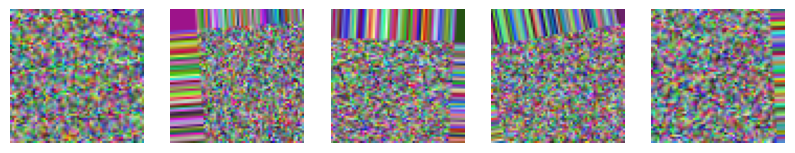

In [34]:
# 1. Using TensorFlow / Keras ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Example: a batch of images (numpy array)
# X_train shape: (num_samples, height, width, channels)
# Here we simulate with random images
X_train = np.random.rand(5, 64, 64, 3)

# Define augmentation
datagen = ImageDataGenerator(
    rotation_range=20,         # rotate images randomly
    width_shift_range=0.2,     # horizontal shift
    height_shift_range=0.2,    # vertical shift
    horizontal_flip=True,      # flip horizontally
    zoom_range=0.2             # random zoom
)

# Generate augmented images
for X_batch in datagen.flow(X_train, batch_size=5, shuffle=False):
    plt.figure(figsize=(10,2))
    for i in range(5):
        plt.subplot(1,5,i+1)
        plt.imshow(X_batch[i])
        plt.axis('off')
    plt.show()
    break  # just one batch


**Code Explination**
- **Import Libraries:** Use `ImageDataGenerator` for augmentation, `NumPy` to create sample images, and `Matplotlib` to visualize them.
- **Simulate Images:** `X_train = np.random.rand(5,64,64,3)` creates 5 random RGB images of size 64×64 to simulate a dataset.
- **Define Augmentation:** `ImageDataGenerator` applies random transformations—rotation (±20°), width/height shift (±20%), horizontal flip, and zoom (±20%)—to increase dataset diversity and prevent overfitting.
- **Generate Augmented Images:** `datagen.flow` creates an iterator that produces augmented batches; `batch_size=5` generates 5 images, `shuffle=False` keeps order, `break` takes only one batch.
- **Visualize Images:** Loop through the batch, plotting each in a 1×5 grid using `plt.subplot`, display with `plt.imshow`, and hide axes with `plt.axis('off')`.

## **Outcome:**
- Shows 5 randomly augmented versions of the original images, demonstrating data augmentation for improving model generalization.

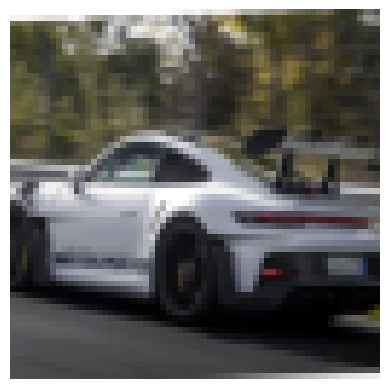

In [35]:
# 2. Using PyTorch torchvision.transforms
from torchvision import transforms
from PIL import Image


# Example: load an image
img = Image.open("car.png")  # replace with your image file

# Define augmentation
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.RandomResizedCrop(64, scale=(0.8,1.0)),
    transforms.ColorJitter(brightness=0.2, contrast=0.2)
])

# Apply augmentation
aug_img = transform(img)

plt.imshow(aug_img)
plt.axis('off')
plt.show()


**Code Explination**
- **import Libraries:**
    - `torchvision.transforms` for defining image augmentation.
    - `PIL.Image` to load images.
- **Load Image:**
    - `img = Image.open("car.png")` loads a single image. Replace `"car.png"` with your file path.
- **Define Augmentation Pipeline:**
    - `transforms.Compose([...])` chains multiple transformations:
        - `RandomHorizontalFlip()`: Randomly flips image horizontally (50% chance).
        - `RandomRotation(20)`: Rotates image randomly ±20 degrees.
        - `RandomResizedCrop(64, scale=(0.8,1.0))`: Crops a random portion and resizes to 64×64; scales between 80–100%.
        - `ColorJitter(brightness=0.2, contrast=0.2)`: Randomly adjusts brightness and contrast.
- **Apply Augmentation:**
    - `aug_img = transform(img)` applies all defined augmentations to the image.
- **Visualize Augmented Image:**
    - `plt.imshow(aug_img)` displays the image.
    - `plt.axis('off')` hides axes for a cleaner view.
    - `plt.show()` renders the image.
      
### **Outcome:**
    - Displays **one randomly augmented version** of the original image.
    - Using this method repeatedly gives multiple augmented variations to enrich training data.

# 🧠 Batch Normalization in Deep Learning

## **Definition**
Batch Normalization (BN) is a technique used in deep neural networks to **normalize the inputs of each layer**.  
It ensures that the inputs to a layer have **zero mean and unit variance** across a mini-batch of training data.

---

## **Why Batch Normalization?**

### **1️⃣ Internal Covariate Shift**
- During training, the inputs to each layer keep changing as previous layers update their weights.  
- This makes training **unstable and slower** because layers constantly adapt to new input distributions.  
- BN **fixes this** by standardizing inputs, reducing the internal covariate shift.

### **2️⃣ Faster Convergence**
- By stabilizing input distributions, BN allows **higher learning rates** without causing divergence.  
- Result: the network reaches good accuracy in **fewer epochs**, speeding up training.

### **3️⃣ Improved Stability**
- Prevents extreme activations between layers.  
- Helps mitigate **vanishing gradients** (very small gradients) and **exploding gradients** (very large gradients).

### **4️⃣ Reduced Overfitting**
- BN introduces a **slight regularization effect** by adding noise during mini-batch normalization.  
- Can reduce overfitting without heavy reliance on dropout.

---

## **How Batch Normalization Works**
For each mini-batch of inputs:

1. **Compute mean and variance** of the batch.  
2. **Normalize inputs:**

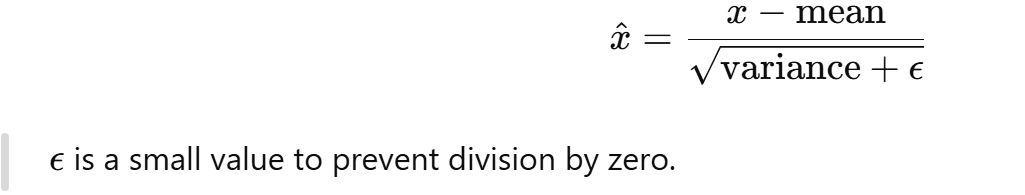


3. **Scale and shift** normalized inputs using learnable parameters γ (scale) and β (shift):

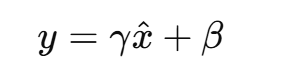

- These parameters allow the network to **still represent the original distribution** if needed.  

---

## **Key Benefits**

| Benefit                | Explanation |
|------------------------|------------|
| **Faster Convergence**  | Allows higher learning rates → fewer epochs needed. |
| **Training Stability**  | Reduces internal covariate shift → smoother gradients. |
| **Reduced Overfitting** | Slight regularization effect → helps generalization. |
| **Layer Independence**  | Each layer receives inputs in a **stable, normalized range**. |

---

## **How BN Normalizes Inputs**
- Inputs to a layer are **centered around 0** (zero mean) and **scaled to unit variance** (standard deviation = 1).  
- Ensures that each layer sees **consistent, stable inputs**, making learning faster and more reliable.  

---

## **How BN Helps with Faster Convergence**
- Normalized inputs → **stable gradients** → prevents vanishing/exploding gradients.  
- Layers adapt faster → don’t need to constantly adjust to shifting input distributions.  
- Higher learning rates can be safely used → network learns faster.

---

## **Intuition for Beginners**
- Imagine each layer receives **ingredients for a recipe**.  
- If ingredients keep changing drastically, the output becomes inconsistent.  
- BN standardizes the ingredients so each layer can produce consistent and reliable outputs.  



Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9054 - loss: 0.3374 - val_accuracy: 0.9547 - val_loss: 0.1642
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9518 - loss: 0.1682 - val_accuracy: 0.9636 - val_loss: 0.1239
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9617 - loss: 0.1287 - val_accuracy: 0.9685 - val_loss: 0.1110
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9676 - loss: 0.1067 - val_accuracy: 0.9677 - val_loss: 0.1063
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9723 - loss: 0.0908 - val_accuracy: 0.9695 - val_loss: 0.1021


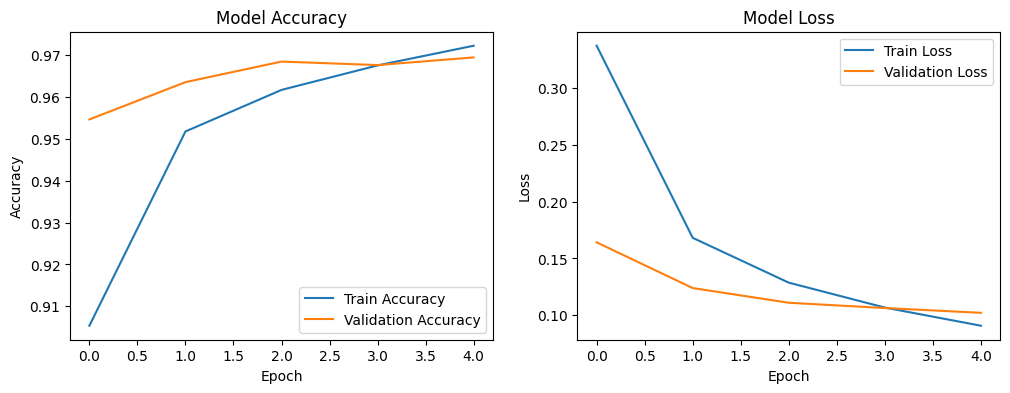

In [36]:
# Normalization Example with MNIST

# 1️⃣ Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# 2️⃣ Preprocess data
x_train = x_train.reshape(-1, 28*28) / 255.0  # Flatten and normalize
x_test = x_test.reshape(-1, 28*28) / 255.0

# 3️⃣ Build the model with Input layer
model = tf.keras.Sequential([
    tf.keras.Input(shape=(784,)),                # Explicit input layer
    tf.keras.layers.Dense(64),                   # Fully connected layer
    tf.keras.layers.BatchNormalization(),        # Batch Normalization
    tf.keras.layers.Activation('relu'),          # Activation after BatchNorm
    tf.keras.layers.Dense(10, activation='softmax')  # Output layer
])

# 4️⃣ Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 5️⃣ Train the model
history = model.fit(x_train, y_train, 
                    epochs=5, batch_size=32, 
                    validation_split=0.2)

# 6️⃣ Plot training & validation accuracy
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# 7️⃣ Plot training & validation loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

**Code Explination**
### **1️⃣ Load MNIST dataset**

- `tf.keras.datasets.mnist.load_data()` downloads the MNIST dataset of handwritten digits (28×28 images).
- Returns training and testing sets: `(x_train, y_train)` and `(x_test, y_test)`.

---

### **2️⃣ Preprocess data**

- `reshape(-1, 28*28)` flattens each 28×28 image into a 784-length vector.
- `/255.0` normalizes pixel values to the range `[0, 1]` for faster training.

---

### **3️⃣ Build the model**

- `tf.keras.Sequential` creates a simple feedforward neural network.
- `tf.keras.Input(shape=(784,))` explicitly defines the input shape.
- `Dense(64)` adds a fully connected layer with 64 neurons.
- `BatchNormalization()` normalizes the layer’s outputs to improve training speed and stability.
- `Activation('relu')` applies ReLU activation **after** batch normalization.
- `Dense(10, activation='softmax')` outputs probabilities for the 10 digit classes.

---

### **4️⃣ Compile the model**

- `optimizer='adam'` uses the Adam optimization algorithm.
- `loss='sparse_categorical_crossentropy'` is suitable for integer-labeled multi-class classification.
- `metrics=['accuracy']` tracks training and validation accuracy.

---

### **5️⃣ Train the model**

- `model.fit(...)` trains the model for `5 epochs` with `batch_size=32`.
- `validation_split=0.2` keeps 20% of training data for validation.
- `history` stores training/validation metrics for plotting.

---

### **6️⃣ Plot accuracy**

- `plt.plot(history.history['accuracy'])` plots training accuracy.
- `plt.plot(history.history['val_accuracy'])` plots validation accuracy.
- Helps visualize how well the model is learning over epochs.

---

### **7️⃣ Plot loss**

- `plt.plot(history.history['loss'])` plots training loss.
- `plt.plot(history.history['val_loss'])` plots validation loss.
- Helps identify underfitting, overfitting, or convergence.

✅ Summary: This code builds a simple MNIST classifier with Batch Normalization to stabilize and accelerate training, and visualizes both training/validation performance.

---

### **Output Summary**

**1️⃣ Training & Validation Metrics**

- Accuracy rises steadily (~97% by epoch 5).
- Loss decreases steadily → model is learning properly.
- No large gap between train & validation → no overfitting.

**2️⃣ Accuracy Plot**

- Both training (blue) and validation (orange) lines go up consistently.
- Lines close → model generalizes well.

**3️⃣ Loss Plot**

- Training and validation loss decrease smoothly.
- Minor gap between train and validation loss → acceptable generalization.

**4️⃣ Overall**

- Model trains fast and effectively in 5 epochs.
- Batch Normalization stabilizes training and speeds convergence

---
# 🧠 Learning Rate Schedulers in Deep Learning

## Definition
Learning rate schedulers are techniques that adjust the learning rate during training to improve convergence, stability, and final performance. Instead of keeping the learning rate constant, schedulers vary it to make training more efficient.

## 1️⃣ Step Decay

### Concept
- Reduces the learning rate by a fixed factor at regular intervals (epochs).
- Idea: take large steps initially for faster learning, then smaller steps later for fine-tuning.

### Formula
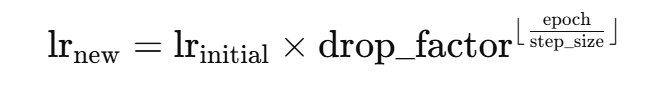

### Example
- Initial LR = 0.1  
- Drop factor = 0.1  
- Step size = 10 epochs  

**Behavior:**  
- Epoch 10 → LR = 0.01  
- Epoch 20 → LR = 0.001  

### Pros
- Simple and easy to implement  
- Helps stabilize training in later epochs  

### Cons
- Not adaptive; does not react to model performance

---

## 2️⃣ ReduceLROnPlateau

### Concept
- Monitors a chosen metric (e.g., validation loss).  
- Reduces learning rate when the metric stops improving for a certain number of epochs (patience).

### Behavior
- Adaptive to model performance  
- Helps the model escape plateaus and converge smoothly  

### Example Parameters
- Monitor = validation loss  
- Factor = 0.5 → LR halves when improvement stalls  
- Patience = 5 → wait 5 epochs before reducing  

### Pros
- Dynamic and responsive to training progress  
- Prevents wasted training steps when the model isn’t improving  

### Cons
- Requires careful choice of metric and patience
---

## 3️⃣ Cosine Annealing

### Concept
- Adjusts learning rate using a cosine function, gradually decreasing from a maximum to a minimum.
- Often combined with **warm restarts**, where LR is periodically reset to a higher value.

### Formula (without restart)

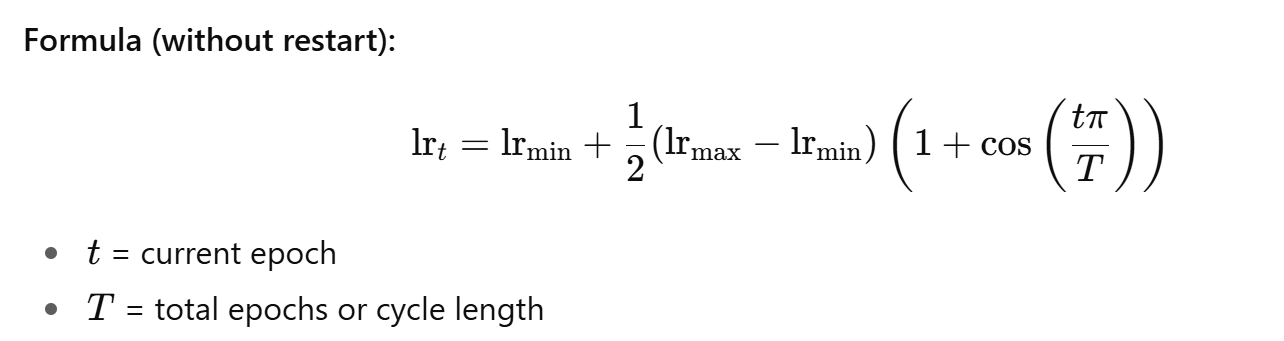

### Warm Restarts
- After each cycle, the learning rate is reset to a high value.  
- Encourages exploration of different regions in the loss landscape.

### Pros
- Smooth decay → avoids sudden jumps in LR  
- Warm restarts can improve generalization and escape local minima  

### Cons
- Slightly more complex to implement

---

## 📊 Summary of Scheduler Usage

| Scheduler           | Type       | Adaptive | Pros                              | Cons                        |
|--------------------|------------|----------|----------------------------------|-----------------------------|
| Step Decay          | Fixed      | ❌        | Simple, stabilizes late training | Not adaptive               |
| ReduceLROnPlateau   | Adaptive   | ✅        | Reacts to performance, prevents wasted steps | Needs careful tuning |
| Cosine Annealing    | Cyclical   | ⚠️        | Smooth decay, better generalization | More complex             |



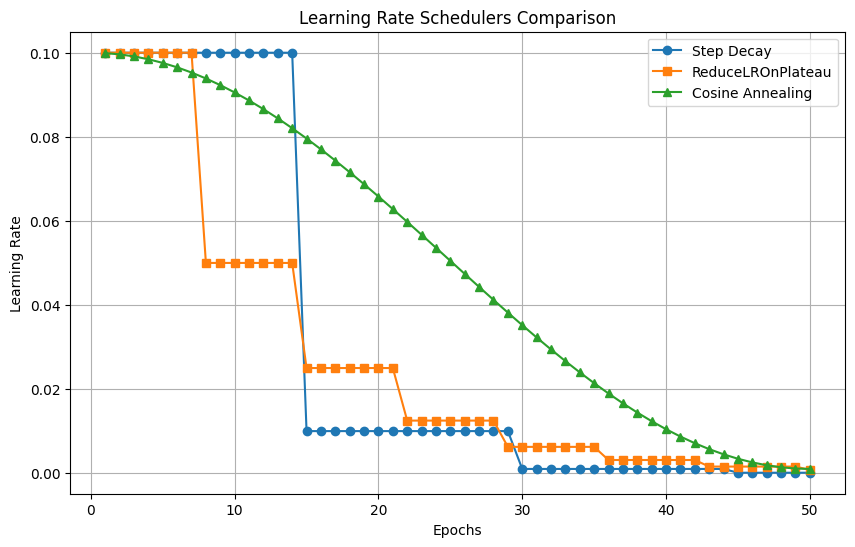

In [37]:
# figure showing all three LR schedules over epochs
# Total epochs
epochs = 50
epoch_list = np.arange(1, epochs + 1)

# --- 1️⃣ Step Decay ---
lr_initial = 0.1
drop_factor = 0.1
step_size = 15
lr_step = lr_initial * drop_factor ** np.floor(epoch_list / step_size)

# --- 2️⃣ ReduceLROnPlateau (simulated) ---
# We'll simulate plateau by reducing LR if no improvement for 7 epochs
lr_reduce = np.ones(epochs) * lr_initial
patience = 7
factor = 0.5
for i in range(epochs):
    if i != 0 and i % patience == 0:
        lr_reduce[i:] *= factor

# --- 3️⃣ Cosine Annealing ---
lr_max = 0.1
lr_min = 0.001
T = epochs
lr_cosine = lr_min + 0.5 * (lr_max - lr_min) * (1 + np.cos(np.pi * epoch_list / T))

# --- Plotting ---
plt.figure(figsize=(10,6))
plt.plot(epoch_list, lr_step, label='Step Decay', marker='o')
plt.plot(epoch_list, lr_reduce, label='ReduceLROnPlateau', marker='s')
plt.plot(epoch_list, lr_cosine, label='Cosine Annealing', marker='^')
plt.xlabel('Epochs')
plt.ylabel('Learning Rate')
plt.title('Learning Rate Schedulers Comparison')
plt.legend()
plt.grid(True)
plt.show()


### Output
### 📊 Learning Rate Schedulers Comparison

1. **Step Decay (blue circles)**
    - Learning rate stays constant for a few epochs, then **drops sharply** at fixed intervals (every ~15 epochs here).
    - Pros: Simple, stabilizes training later.
    - Behavior in plot: sudden drops at certain epochs (around 15, 30, 45).
2. **ReduceLROnPlateau (orange squares)**
    - Learning rate **reduces when progress stalls** (simulated every 7 epochs here).
    - Adaptive: reacts to model performance.
    - Behavior in plot: multiple small step-like reductions, not tied to a fixed interval.
3. **Cosine Annealing (green triangles)**
    - Learning rate **smoothly decreases** following a cosine curve.
    - Optional warm restarts can reset LR periodically (not shown here).
    - Behavior in plot: smooth, gradual decay from high to low LR over all epochs.

---

### ✅ Key Takeaways

- **Step Decay:** sharp drops → easy to implement.
- **ReduceLROnPlateau:** adaptive → reduces wasted training steps.
- **Cosine Annealing:** smooth decay → avoids sudden jumps, better for generalization.
- Use this plot to **visualize how each scheduler changes LR over epochs**.

# 📊 Evaluation Metrics in Machine Learning
 Evaluation metrics are used to **assess the performance of a machine learning model**. They help us understand how well a model predicts and identify areas for improvement.

# 1️⃣ **What is an Evaluation Metric?** 
- **Definition:** A quantitative measure to evaluate model performance.
- **Why we use it:**  
    ✅ Measure correctness of predictions  
    ✅ Compare different models  
    ✅ Decide if a model is ready for deployment  
    ✅ Identify weaknesses like overfitting, bias, or class imbalance  

---

# 2️⃣ **Types of Evaluation Metrics**
 
 **Classification Metrics:**  
 📌 Accuracy  
 🎯 Precision  
 📈 Recall (Sensitivity)  
 ⚖️ F1 Score  
 🧩 Confusion Matrix  

# **Regression Metrics:**  
 📏 Mean Squared Error (MSE)  
  📐 Mean Absolute Error (MAE)  
  📊 R² Score  
 
---

#### Here, we focus on **classification metrics**.

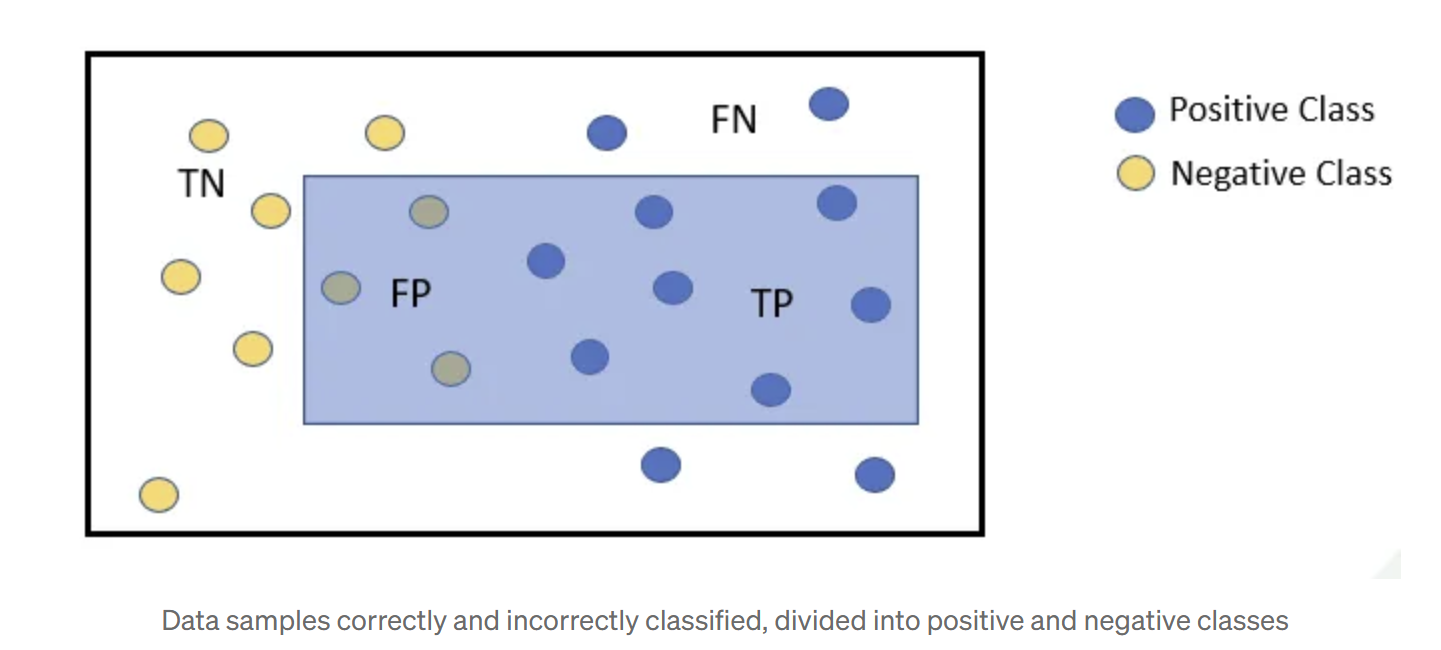

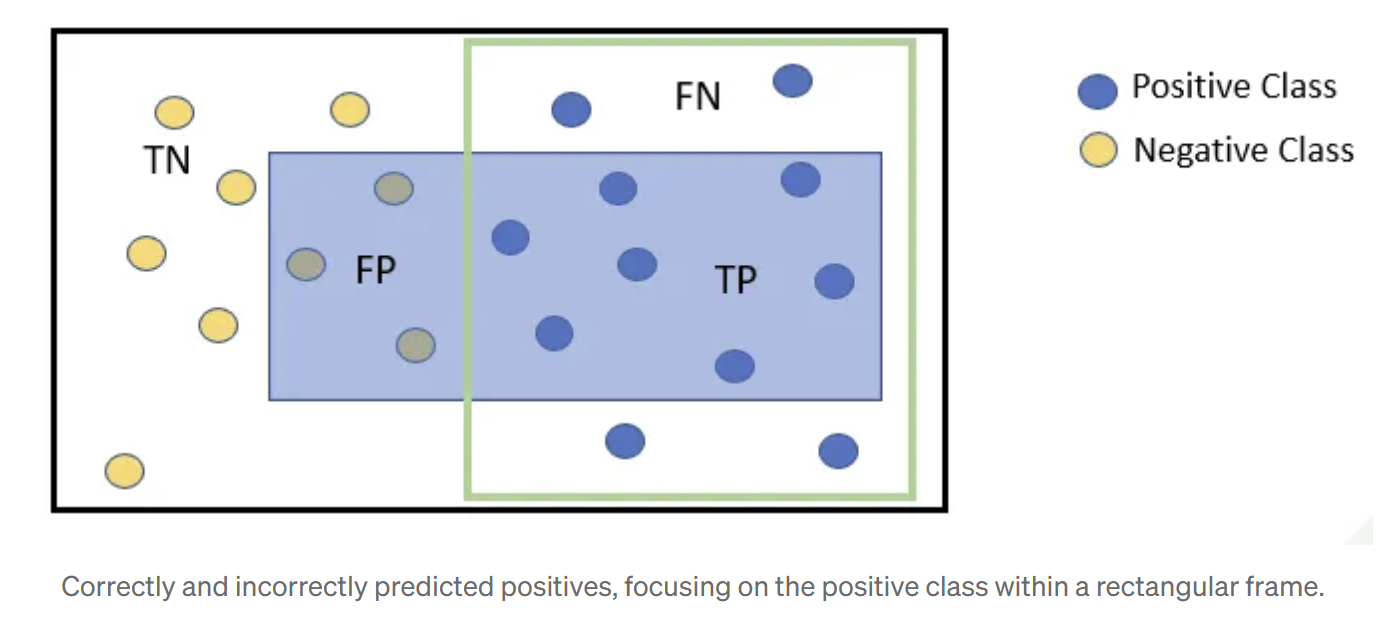

# 3️⃣ **🧩 Confusion Matrix**

# A Confusion Matrix shows **actual vs predicted labels**:
 
 |               | Predicted Positive | Predicted Negative |
 |---------------|------------------|------------------|
 | Actual Positive | True Positive (TP) | False Negative (FN) |
 | Actual Negative | False Positive (FP) | True Negative (TN) |
 
 **Definitions:**  
 - TP ✅ = Model correctly predicts positive  
 - FP ❌ = Model incorrectly predicts positive  
 - FN ❌ = Model incorrectly predicts negative  
 - TN ✅ = Model correctly predicts negative  
 
**Use:**  
- Detailed error analysis  
- Basis for Accuracy, Precision, Recall, and F1

---

# 4️⃣ **✅ Accuracy**
 
- **Definition:** Proportion of correct predictions over all predictions  
- **Formula:**
  
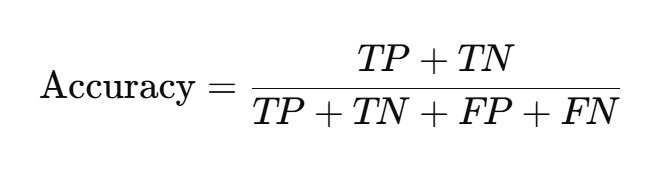

- **Pros:** Easy to compute and interpret  
- **Cons:** Misleading in imbalanced datasets  
- **Use:** Good for balanced datasets

---

# 5️⃣ **🎯 Precision**

- **Definition:** Proportion of predicted positives that are actually correct  
 - **Formula:**  
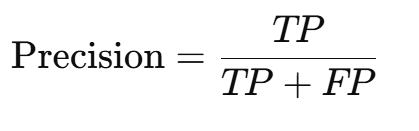

- **Why it matters:** Focuses on avoiding false positives  
- **Example:** Email spam detection → avoid marking legitimate emails as spam  
- **Use:** Important when false positives are costly
---

# 6️⃣ **📈 Recall (Sensitivity / True Positive Rate)**

- **Definition:** Proportion of actual positives correctly identified  
- **Formula:**  
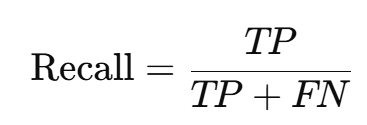
- **Why it matters:** Focuses on avoiding false negatives  
- **Example:** Medical diagnosis → missing a disease is critical  
- **Use:** Important when missing positive cases is dangerous

---

# 7️⃣ **⚖️ F1 Score**

- **Definition:** Harmonic mean of Precision and Recall  
- **Formula:**
  
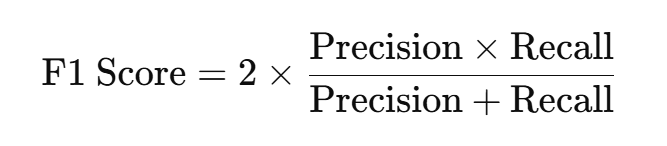
 
- **Why it matters:** Balances Precision and Recall  
- **Use:** Useful in imbalanced datasets or when both false positives and negatives matter

---
# 8️⃣ **📋 Summary Table**
 
 | Metric           | Formula                                      | Focus Area                  | Use Case                                   |
 |-----------------|----------------------------------------------|-----------------------------|-------------------------------------------|
 | ✅ Accuracy       | (TP + TN)/(TP + TN + FP + FN)               | Overall correctness         | Balanced datasets                           |
 | 🎯 Precision      | TP/(TP + FP)                                | Correct positive predictions| Avoid false positives                       |
 | 📈 Recall         | TP/(TP + FN)                                | Capturing actual positives  | Avoid false negatives                       |
 | ⚖️ F1 Score       | 2*(Precision*Recall)/(Precision+Recall)     | Balance Precision & Recall  | Imbalanced datasets, critical applications |
 | 🧩 Confusion Matrix | Table of TP, FP, FN, TN                    | Detailed prediction breakdown| Basis for other metrics, error analysis    |
 
---
✅ **Key Takeaways**
- Confusion Matrix 🧩 provides a complete picture of model performance  
- Accuracy ✅ is simple but unreliable for imbalanced datasets  
- Precision 🎯 targets false positives  
- Recall 📈 targets false negatives  
- F1 Score ⚖️ balances Precision and Recall  
- Choosing the right metric depends on your problem (spam detection, medical diagnosis, fraud detection)
---

In [38]:
# Evaluation matrix (Accuracy, Confusion matrix, precision, F1score and Recall)
#  Import required libraries
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier


#  Load dataset (Iris dataset as an example)
data = load_iris()
X = data.data
y = data.target

# For simplicity, let's convert this into a binary classification problem
# We'll consider class 0 as positive, and classes 1 & 2 as negative
y_binary = (y == 0).astype(int)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=42)


#  Train a simple classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)


#  Calculate Evaluation Metrics
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


#  Display results
print("Confusion Matrix:\n", cm)
print(f"Accuracy: {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")
print(f"F1 Score: {f1:.2f}")


Confusion Matrix:
 [[26  0]
 [ 0 19]]
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


**Code Explination**
- **Import Libraries:**
    - `sklearn` metrics for evaluation, `train_test_split` for splitting data, `load_iris` dataset, and `RandomForestClassifier` for classification.
- **Load Dataset:**
    - Loads the Iris dataset (`X` = features, `y` = labels).
- **Binary Conversion:**
    - Converts it into a binary classification problem: class 0 = positive, classes 1 & 2 = negative.
- **Split Data:**
    - Splits dataset into training (70%) and testing (30%) sets.
- **Train Classifier:**
    - Trains a `RandomForestClassifier` on the training set.
- **Make Predictions:**
    - Predicts labels on the test set (`y_pred`).
- **Compute Metrics:**
    - `confusion_matrix` → TP, TN, FP, FN
    - `accuracy_score` → Overall correct predictions
    - `precision_score` → Correct positive predictions
    - `recall_score` → Correctly detected positives
    - `f1_score` → Harmonic mean of Precision & Recall
- **Display Results:**
    - Prints the confusion matrix and all evaluation metrics rounded to 2 decimals.

# 📊 L2 Regularization (Ridge Regression)

L2 Regularization is used to **prevent overfitting** by penalizing large coefficients in a regression model.
It is also known as **Ridge Regression**.

# 1️⃣ **What is L2 Regularization?**

**Definition:** Adds a penalty equal to the **sum of squared coefficients** to the loss function.

**Purpose:**  
- ✅ Reduce overfitting  
- ✅ Make model generalize better  
- ✅ Keep coefficients small without setting them exactly to zero


# 2️⃣ **Mathematical Formulation**

**1. Ordinary Least Squares (OLS) Loss Function:**  

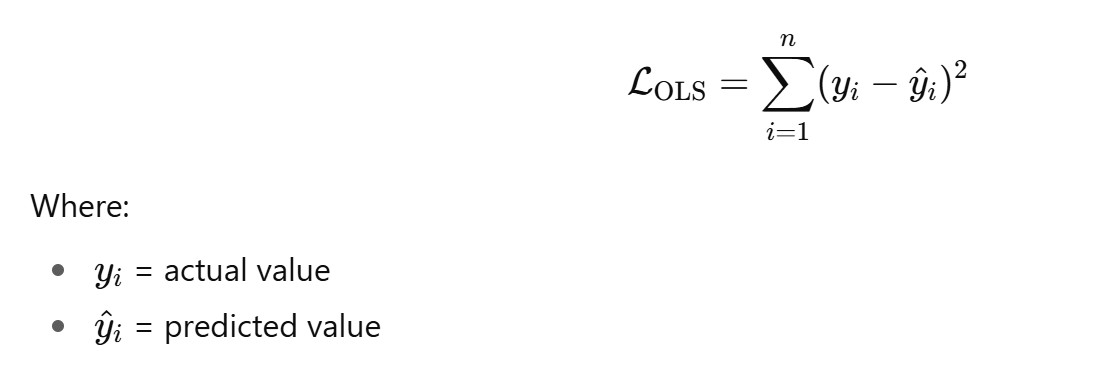

**2. Ridge Regression (L2 Regularization) Loss Function:**  

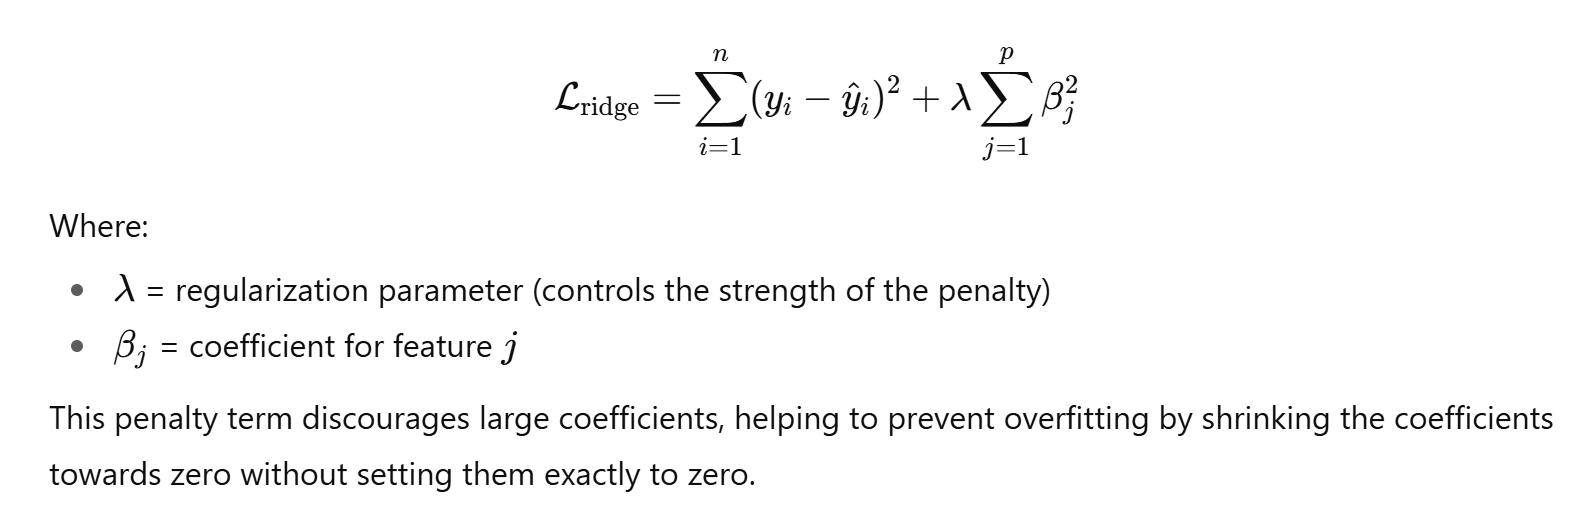

**3. Weight Update with L2:**

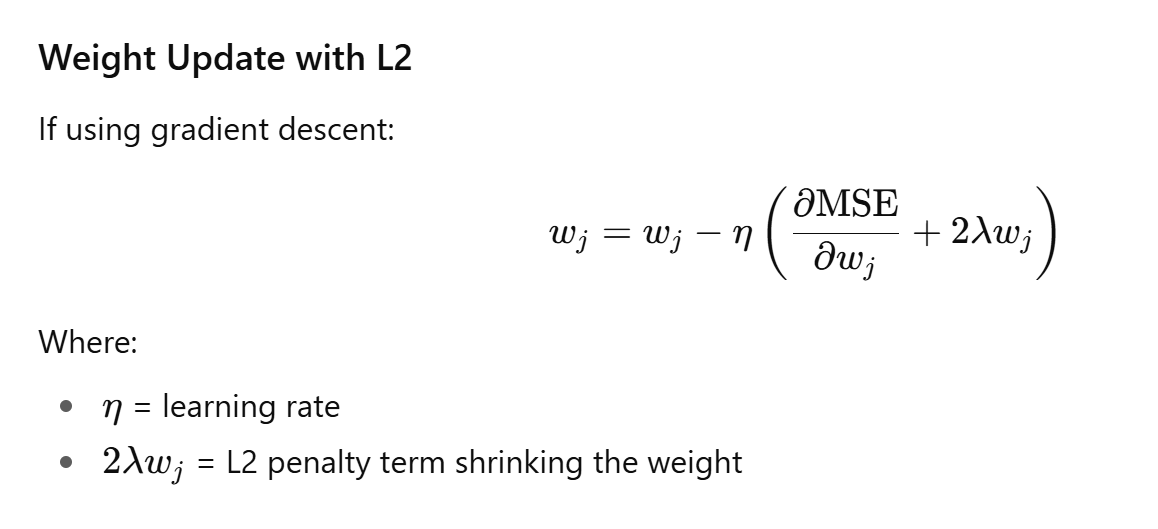

# 3️⃣ **Intuition**

**Overfitting**: Model fits noise in training data → poor performance on new data.  
**Regularization**: Adds penalty to constrain the model complexity.  
**L2**: Penalizes large weights using their **squared values**, shrinking coefficients toward zero but not exactly zero.  
**Effect**: Reduces variance and improves generalization.


# **Key Points**

- `alpha` controls regularization strength (higher → stronger penalty)  
- Coefficients (`coef_`) are **shrunk** but rarely exactly zero  
- L2 is effective when features are **highly correlated**  
- Helps **reduce model variance** and improve generalization


# ✅ **Summary**

- L2 Regularization = Ridge Regression = Squared penalty on coefficients  
- Helps prevent overfitting  
- Works well for regression tasks and highly correlated features  
- Simple to implement in Python using `Ridge` from `sklearn`


In [39]:
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate synthetic data
X, y = make_regression(n_samples=100, n_features=2, noise=0.1, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Ridge Regression model with alpha as the regularization strength
ridge_model = Ridge(alpha=1.0)

# Fit the model
ridge_model.fit(X_train, y_train)

# Predict on the test set
y_pred = ridge_model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

print(f"Ridge Regression Coefficients: {ridge_model.coef_}")
print(f"Mean Squared Error: {mse}")


Ridge Regression Coefficients: [86.20075128 73.04533557]
Mean Squared Error: 2.5183287855393557


# 📊 Batch Normalization (BatchNorm)

Batch Normalization is a technique to **normalize the inputs of each layer** in a neural network, improving training speed and stability.

---

## 1️⃣ Batch Normalization Equations

For a mini-batch of inputs \(x = \{x_1, x_2, ..., x_m\}\):

### **Step 1: Compute the batch mean**  

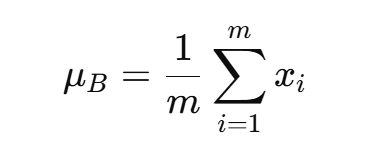

### **Step 2: Compute the batch variance**  

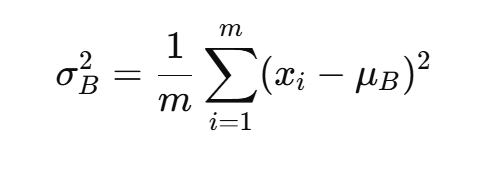

### **Step 3: Normalize the batch**  

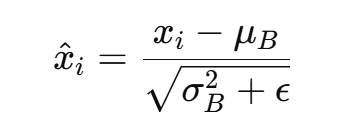

Where ϵ is a small constant for numerical stability.

### **Step 4: Scale and shift (learnable parameters)**  

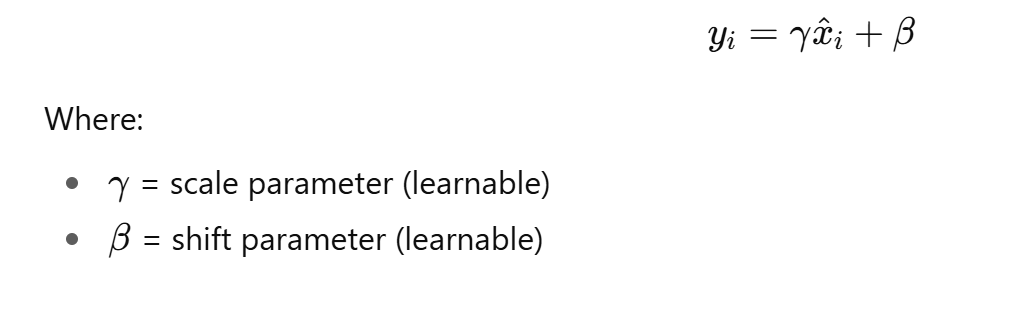

---

## 2️⃣ Intuition

- Normalizes each feature to have **mean 0** and **variance 1** within a mini-batch.  
- **Scale (\(\gamma\)) and shift (\(\beta\))** allow the network to **learn the optimal distribution**.  
- Benefits:  
  ✅ Accelerates training  
  ✅ Reduces internal covariate shift  
  ✅ Improves generalization and stability  

---

## 3️⃣ Summary

Batch Normalization makes neural network training **faster and more stable** by standardizing the inputs of each layer while still allowing the network to **learn appropriate scales and offsets**.
